# Classification of Images

- Taken from: https://storage.googleapis.com/openimages/web/download_v7.html
- Classes here: Bicycle, Golf Cart, Balloonion

Execute the cell below to connect to the Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade pip setuptools wheel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.5/821.5 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install fiftyone

  Using cached fiftyone-0.23.7-py3-none-any.whl.metadata (12 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl.metadata (9.7 kB)
  Using cached argcomplete-3.2.3-py3-none-any.whl.metadata (16 kB)
  Using cached boto3-1.34.79-py3-none-any.whl.metadata (6.6 kB)
  Using cached dacite-1.7.0-py3-none-any.whl.metadata (14 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl.metadata (5.4 kB)
  Using cached ftfy-6.2.0-py3-none-any.whl.metadata (7.3 kB)
  Using cached hypercorn-0.16.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl.metadata (15 kB)
  Using cached mongoengine-0.24.2-py3-none-any.whl.metadata (6.7 kB)
  Using cached motor-3.4.0-py3-none-any.whl.metadata (21 kB)
  Using cached pprintpp-0.4.0-py2.py3-none-any.whl.metadata (7.9 kB)
  Using cached pymongo-4.6.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (22 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
  Using cached sseclient_p

In [ ]:
# !pip freeze > requirements.txt

## Imports

In [ ]:
import fiftyone as fo
import pandas as pd
from fiftyone import ViewField as F

# library to deal with images
from PIL import Image
from IPython.display import display

# for model training
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'fiftyone'

\## Main

First lets fetch the Dataset. we are using fiftyone to view and downlaod the images the images. Since we are only working with three classes we are going to filter the dataset on these 3 classes : ['Bicycle','Balloon','Golf cart'] which we have stored in an array named "classes". The dataset will be stored in the /root folder.

In [ ]:
my_classes = ['Bicycle','Balloon','Golf cart']

In [ ]:
dataset = fo.zoo.load_zoo_dataset(
    "open-images-v7",
    split="train",
    label_types=["detections"],
    classes=my_classes,
    max_samples=1000,
    shuffle=True,
    seed = 42
)

INFO:fiftyone.zoo.datasets:Downloading split 'train' to '/root/fiftyone/open-images-v7/train' if necessary


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/train/train-images-boxable-with-rotation.csv' to '/root/fiftyone/open-images-v7/train/metadata/image_ids.csv'


 100% |██████|    4.8Gb/4.8Gb [21.0s elapsed, 0s remaining, 261.2Mb/s]      


INFO:eta.core.utils: 100% |██████|    4.8Gb/4.8Gb [21.0s elapsed, 0s remaining, 261.2Mb/s]      


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v5/class-descriptions-boxable.csv' to '/root/fiftyone/open-images-v7/train/metadata/classes.csv'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/2018_04/bbox_labels_600_hierarchy.json' to '/tmp/tmpa52ysz7d/metadata/hierarchy.json'


INFO:fiftyone.utils.openimages:Downloading 'https://storage.googleapis.com/openimages/v6/oidv6-train-annotations-bbox.csv' to '/root/fiftyone/open-images-v7/train/labels/detections.csv'


INFO:fiftyone.utils.openimages:Downloading 1000 images


 100% |█████████████████| 1000/1000 [1.1m elapsed, 0s remaining, 16.4 files/s]      


INFO:eta.core.utils: 100% |█████████████████| 1000/1000 [1.1m elapsed, 0s remaining, 16.4 files/s]      


Dataset info written to '/root/fiftyone/open-images-v7/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/open-images-v7/info.json'


Loading 'open-images-v7' split 'train'


INFO:fiftyone.zoo.datasets:Loading 'open-images-v7' split 'train'


 100% |███████████████| 1000/1000 [14.7s elapsed, 0s remaining, 66.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 1000/1000 [14.7s elapsed, 0s remaining, 66.3 samples/s]      


Dataset 'open-images-v7-train-1000' created


INFO:fiftyone.zoo.datasets:Dataset 'open-images-v7-train-1000' created


We have downloaded a lot of data right now. To make sure we are only working with the relevant data that we need we will have to further filter the downloaded data. That we are doing by filtering the dataset to include only the samples where the label is one of the classes specified.

> Blockzitat einfügen



In [ ]:
dataset = dataset.filter_labels("ground_truth", F("label").is_in(my_classes))

Now lets check out with what data we are actually working - This we can do by a few small Data Exploration steps

In [ ]:
num_samples = len(dataset)
print("Number of samples:", num_samples)

Number of samples: 1000


In [ ]:
samples_per_class = dataset.count_values("ground_truth.detections.label")
print("Samples per class:", samples_per_class)

Samples per class: {'Balloon': 791, 'Bicycle': 2072, 'Golf cart': 24}


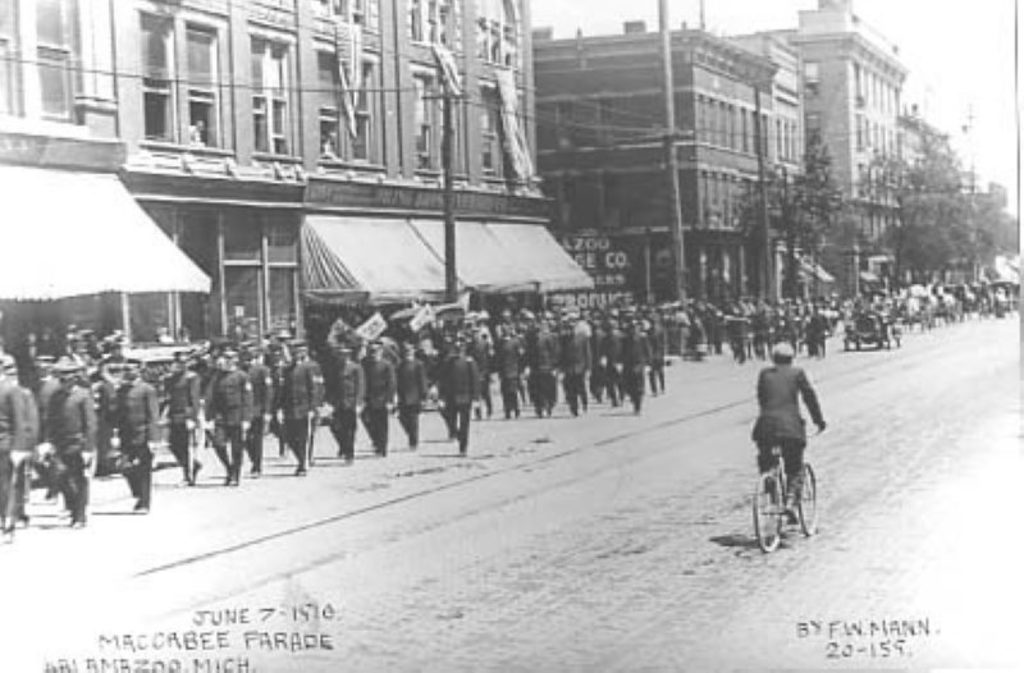

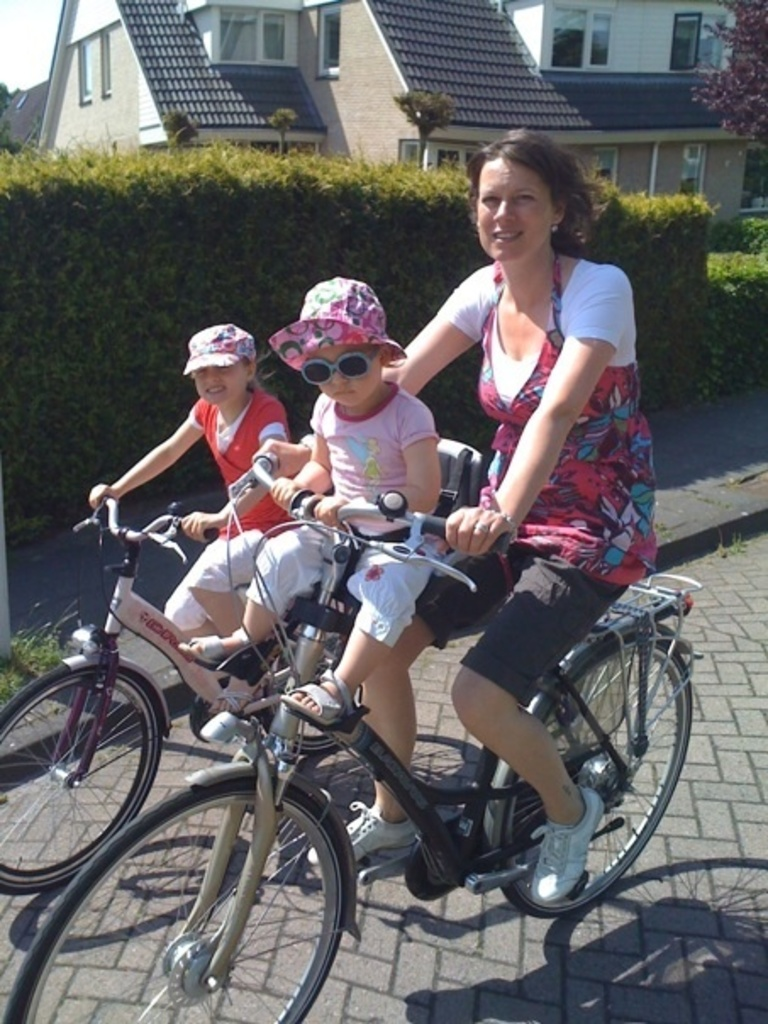

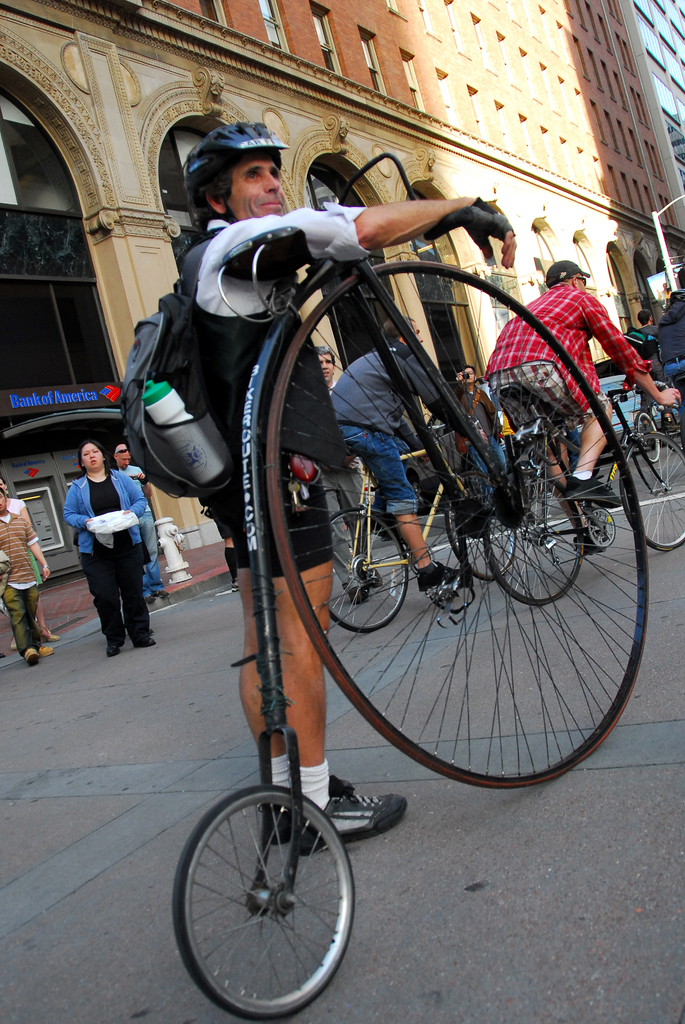

In [ ]:
for sample_view in dataset[:3]:  # Iterate over the first 3 SampleView objects
    filepath = sample_view["filepath"]  # Get the filepath of the image
    image = Image.open(filepath)  # Open the image using Pillow
    display(image)  # Display the image in the notebook

Now lets focus more on the images we will need for our task here. To do so we will convert the images to "patches". Those patches focus more closly on the part of the image in which the object is seen .

**Please edit the path to fit with yours**

In [ ]:
export_dir = "drive/MyDrive/ComputerVision/images"

In [ ]:
# Convert the dataset to patches and export them
patches = dataset.to_patches("ground_truth")

patches.export(
    export_dir=export_dir,
    dataset_type=fo.types.ImageClassificationDirectoryTree,
    label_field="ground_truth",
)

Directory 'drive/MyDrive/ComputerVision/images' already exists; export will be merged with existing files


Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detection'>. Exporting image patches...


INFO:fiftyone.utils.data.exporters:Detected an image classification exporter and a label field 'ground_truth' of type <class 'fiftyone.core.labels.Detection'>. Exporting image patches...


 100% |███████████████| 2887/2887 [1.4m elapsed, 0s remaining, 34.3 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2887/2887 [1.4m elapsed, 0s remaining, 34.3 samples/s]      


We have now exported the patches. To use the images for training and testing purposes we will have to import or load the dataset from the directory and then split the patches

In [ ]:
import os
import shutil
import random

# Define the path to your main image directory
image_dir = "drive/MyDrive/ComputerVision/images"
export_dir = "drive/MyDrive/ComputerVision/CV"

# Define the paths for train and test directories
train_dir = os.path.join(export_dir, "train")
test_dir = os.path.join(export_dir, "test")

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
train_dir = 'drive/MyDrive/ComputerVision/CV/train'

In [ ]:
test_dir = 'drive/MyDrive/ComputerVision/CV/test'

In [ ]:
# List all class folders in the main image directory
class_folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

In [ ]:
class_folders

['Bicycle', 'Balloon', 'Golf cart']

In [ ]:
# Define the split ratio
train_split_ratio = 0.8

# For each class folder, split images into train and test sets
for class_folder in class_folders:
    class_images = os.listdir(os.path.join(image_dir, class_folder))
    print(os.path.join(image_dir, class_folder))

drive/MyDrive/ComputerVision/images/Bicycle
drive/MyDrive/ComputerVision/images/Balloon
drive/MyDrive/ComputerVision/images/Golf cart


In [ ]:
# Define the split ratio
random.seed(42)

# For each class folder, split images into train and test sets
for class_folder in class_folders:
    class_images = os.listdir(os.path.join(image_dir, class_folder))
    random.shuffle(class_images)
    num_train_images = int(len(class_images) * train_split_ratio)

    # Copy images to train directory
    for image_file in class_images[:num_train_images]:
        src_path = os.path.join(image_dir, class_folder, image_file)
        dest_path = os.path.join(train_dir, class_folder, image_file)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(src_path, dest_path)

    # Copy remaining images to test directory
    for image_file in class_images[num_train_images:]:
        src_path = os.path.join(image_dir, class_folder, image_file)
        dest_path = os.path.join(test_dir, class_folder, image_file)
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(src_path, dest_path)

print("Splitting into train and test sets complete.")

Splitting into train and test sets complete.


In the next step we will be using the ResNet50 which is already pre-trained with the imagenet.


ResNet50 pre-trained on ImageNet is a convolutional neural network architecture designed for image recognition tasks. ImageNet provides a vast dataset for training, allowing ResNet50 to learn a broad range of visual features across numerous categories. This pre-training equips ResNet50 with the ability to extract intricate patterns and textures from images, making it highly effective for tasks such as classification, object detection, and segmentation. Leveraging ResNet50's pre-trained weights offers a significant advantage by providing a strong foundation for building custom models, reducing the need for extensive training on smaller datasets and improving performance on diverse image-related tasks.

### Imports for Model training

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Model Training - ResNet50 ; No changes ; Pre-Trained on Imagenet

Firstly we will need our test and train data back. For that please define where the train and test data has been saved in your OS for the code to run through. The definitions of the train and test directory have already been done before !!

In [ ]:
# Image dimensions
img_height, img_width = 224, 224 #this appears to be the standard input shape for the keras ResNet50
batch_size = 32

In [ ]:
# Data normalization for training and testing
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Prepare data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2308 images belonging to 3 classes.
Found 579 images belonging to 3 classes.


In [ ]:
# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False) #include_top specifies whether to include the fully-connected layer at the top of the network.

In [ ]:
# Global average pooling and output layer
x = GlobalAveragePooling2D()(base_model.output)
output = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
# Construct the model
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Freeze the base ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Define the file path for model checkpoint
model_checkpoint_file = "drive/MyDrive/ComputerVision/models/model_og_checkpoint.keras"

# Define callbacks
checkpoint = ModelCheckpoint(model_checkpoint_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
tensorboard = TensorBoard(log_dir="drive/MyDrive/ComputerVision/models/logs/logs_basic", histogram_freq=1)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[checkpoint, early_stopping, tensorboard]
)

Epoch 1/10
73/73 [==============================] - ETA: 0s - loss: 0.4971 - accuracy: 0.7747
Epoch 1: val_accuracy improved from -inf to 0.86183, saving model to drive/MyDrive/ComputerVision/models/model_og_checkpoint.keras
73/73 [==============================] - 151s 2s/step - loss: 0.4971 - accuracy: 0.7747 - val_loss: 0.4302 - val_accuracy: 0.8618
Epoch 2/10
73/73 [==============================] - ETA: 0s - loss: 0.4044 - accuracy: 0.8739
Epoch 2: val_accuracy improved from 0.86183 to 0.87047, saving model to drive/MyDrive/ComputerVision/models/model_og_checkpoint.keras
73/73 [==============================] - 155s 2s/step - loss: 0.4044 - accuracy: 0.8739 - val_loss: 0.3962 - val_accuracy: 0.8705
Epoch 3/10
73/73 [==============================] - ETA: 0s - loss: 0.3774 - accuracy: 0.8860
Epoch 3: val_accuracy improved from 0.87047 to 0.89119, saving model to drive/MyDrive/ComputerVision/models/model_og_checkpoint.keras
73/73 [==============================] - 148s 2s/step - los

In [ ]:
# Evaluate the model on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

19/19 [==============================] - 29s 2s/step - loss: 0.3359 - accuracy: 0.8929
Test loss: 0.335912823677063
Test accuracy: 0.8929188251495361


In [ ]:
# Check if the model file exists
if not os.path.exists(model_checkpoint_file):
    raise FileNotFoundError(f"Model file '{model_checkpoint_file}' not found.")

In [ ]:
from tensorflow.keras.models import load_model
# Load the trained model
model_checkpoint_file = "drive/MyDrive/ComputerVision/models/model_og_checkpoint.keras"
model = load_model(model_checkpoint_file)

In [ ]:
# Compute the number of parameters of the model
num_params = model.count_params()
print("Number of parameters of the model:", num_params)

Number of parameters of the model: 23593859


In [ ]:
import numpy as np
#this generator does not shuffle data, used for confusion matrices
test_generator_no_shuffle = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = False
)
y_pred = model.predict(test_generator_no_shuffle)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true = test_generator_no_shuffle.classes  # True class labels from the generator

Found 579 images belonging to 3 classes.
19/19 [==============================] - 30s 1s/step


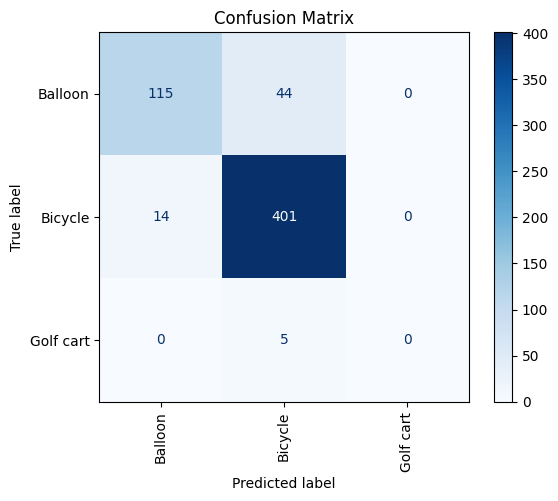

In [ ]:
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
class_names = sorted(os.listdir(train_dir))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.title('Confusion Matrix')
plt.show()

In the next steps we want to see how the model changes if we augment the images to an extent:

- Random flip
- Random rotate
- Random transition

So lets see how different random types of data augmentation will change the results of the accuracy of the modelion


In [ ]:
# Define different parameters for data augmentation
augmentation_params = [
    {"horizontal_flip": True},
    {"rotation_range": 30},
    {"width_shift_range": 0.2},
    {"height_shift_range": 0.2},
    {"horizontal_flip": True, "rotation_range": 30, "width_shift_range": 0.2},
    {"horizontal_flip": True, "rotation_range": 30, "height_shift_range": 0.2},
    {"horizontal_flip": True, "width_shift_range": 0.2, "height_shift_range": 0.2},
]

In [ ]:
# Image dimensions
img_height, img_width = 224, 224
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Number of classes

NameError: name 'train_dir' is not defined

In [ ]:
# Train models with different augmentation parameters
for i, params in enumerate(augmentation_params):
    print(f"Training model {i+1} with augmentation parameters: {params}")

    # Data augmentation for training data
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        **params
    )

    # Data normalization for testing data
    test_datagen = ImageDataGenerator(rescale=1./255)

    # Prepare data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Load pre-trained ResNet50 model
    base_model = ResNet50(weights='imagenet', include_top=False)

    # Global average pooling and output layer
    x = GlobalAveragePooling2D()(base_model.output)
    output = Dense(num_classes, activation='softmax')(x)

    # Construct the model
    model = Model(inputs=base_model.input, outputs=output)

    # Freeze the base ResNet50 layers
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
    checkpoint = ModelCheckpoint(f"drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_{i}.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
    tensorboard = TensorBoard(log_dir=f"drive/MyDrive/ComputerVision/models/logs/logs_augmented_{i}", histogram_freq=1)

    # Train the model with data augmentation
    history = model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator,
        callbacks=[checkpoint, early_stopping, tensorboard]
    )

    # Evaluate the model on test set
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test loss:", test_loss)
    print("Test accuracy:", test_accuracy)

Training model 1 with augmentation parameters: {'horizontal_flip': True}
Found 2308 images belonging to 3 classes.
Found 579 images belonging to 3 classes.
Epoch 1/10
73/73 [==============================] - ETA: 0s - loss: 0.5525 - accuracy: 0.7110
Epoch 1: val_accuracy improved from -inf to 0.88774, saving model to drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_0.keras
73/73 [==============================] - 143s 2s/step - loss: 0.5525 - accuracy: 0.7110 - val_loss: 0.4467 - val_accuracy: 0.8877
Epoch 2/10
73/73 [==============================] - ETA: 0s - loss: 0.4147 - accuracy: 0.8895
Epoch 2: val_accuracy did not improve from 0.88774
73/73 [==============================] - 120s 2s/step - loss: 0.4147 - accuracy: 0.8895 - val_loss: 0.4071 - val_accuracy: 0.8687
Epoch 3/10
73/73 [==============================] - ETA: 0s - loss: 0.3863 - accuracy: 0.8817
Epoch 3: val_accuracy did not improve from 0.88774
73/73 [==============================] - 121s 2s/step - loss

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_0.keras
Number of parameters of the model: 23593859
19/19 [==============================] - 31s 2s/step - loss: 0.3365 - accuracy: 0.8946
Test loss: 0.33648648858070374
Test accuracy: 0.8946459293365479
19/19 [==============================] - 30s 2s/step


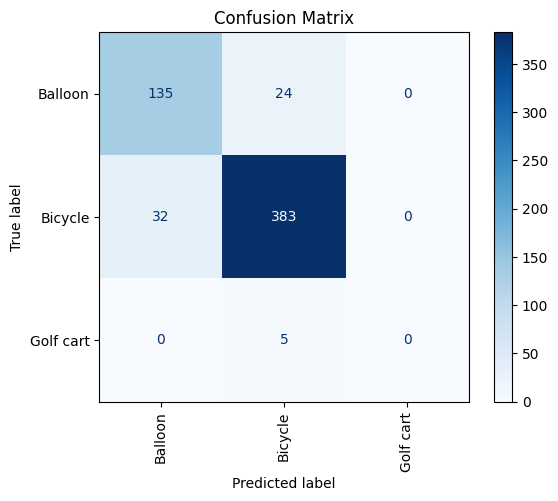

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_1.keras
Number of parameters of the model: 23593859
19/19 [==============================] - 31s 2s/step - loss: 0.3550 - accuracy: 0.8964
Test loss: 0.3549792468547821
Test accuracy: 0.8963730335235596
19/19 [==============================] - 30s 2s/step


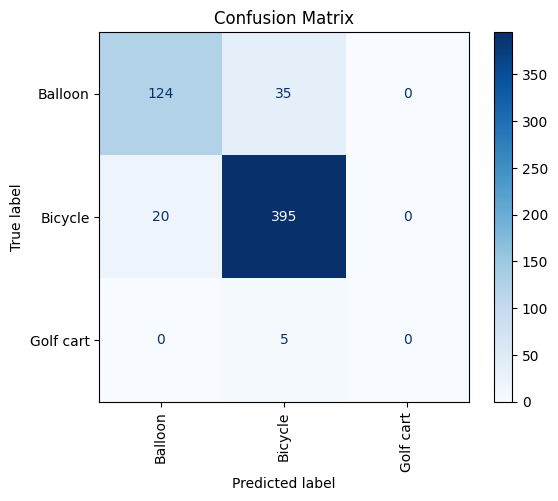

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_2.keras
Number of parameters of the model: 23593859
19/19 [==============================] - 31s 2s/step - loss: 0.3334 - accuracy: 0.8964
Test loss: 0.33340373635292053
Test accuracy: 0.8963730335235596
19/19 [==============================] - 30s 2s/step


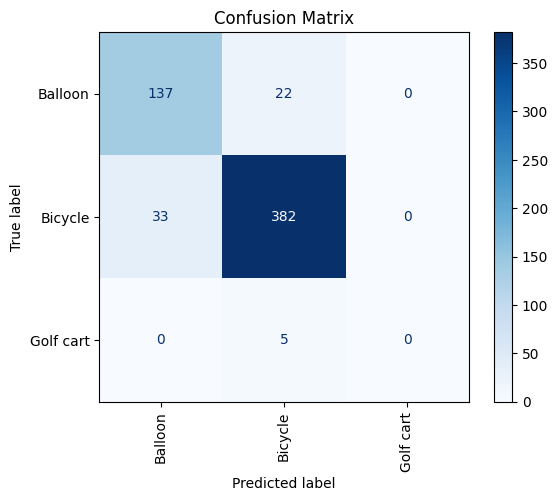

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_3.keras
Number of parameters of the model: 23593859
19/19 [==============================] - 31s 2s/step - loss: 0.3438 - accuracy: 0.9016
Test loss: 0.34375670552253723
Test accuracy: 0.9015544056892395
19/19 [==============================] - 30s 2s/step


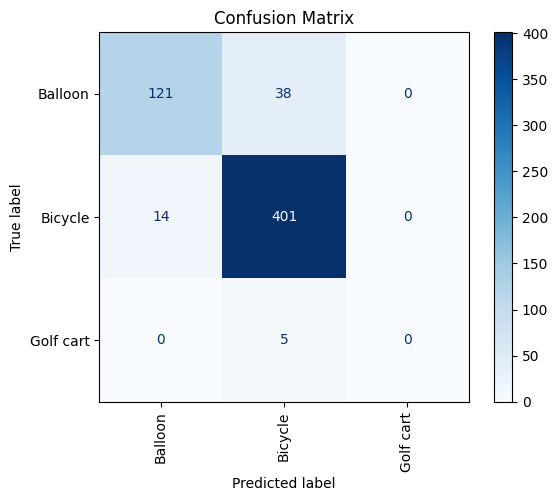

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_4.keras
Number of parameters of the model: 23593859
19/19 [==============================] - 32s 2s/step - loss: 0.3716 - accuracy: 0.8877
Test loss: 0.37164613604545593
Test accuracy: 0.8877374529838562
19/19 [==============================] - 30s 2s/step


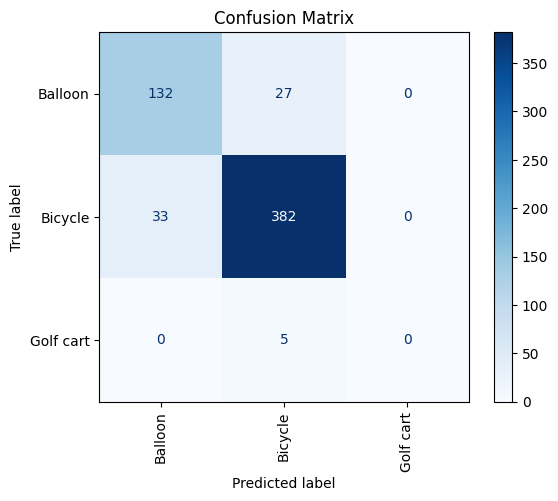

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_5.keras
Number of parameters of the model: 23593859
19/19 [==============================] - 31s 2s/step - loss: 0.3491 - accuracy: 0.8912
Test loss: 0.349118709564209
Test accuracy: 0.8911917209625244
19/19 [==============================] - 30s 2s/step


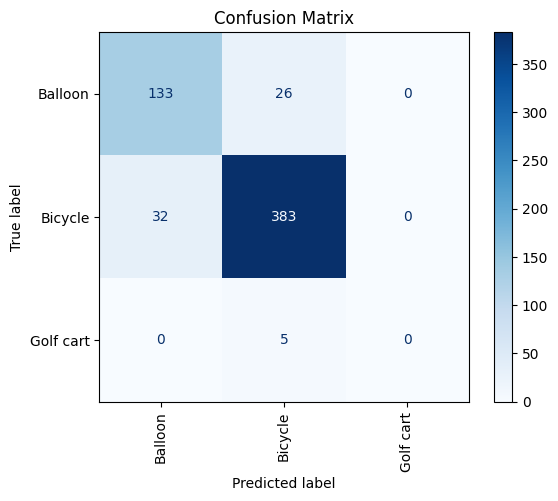

Model: drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_6.keras
Number of parameters of the model: 23593859
19/19 [==============================] - 31s 2s/step - loss: 0.3359 - accuracy: 0.8929
Test loss: 0.335912823677063
Test accuracy: 0.8929188251495361
19/19 [==============================] - 30s 2s/step


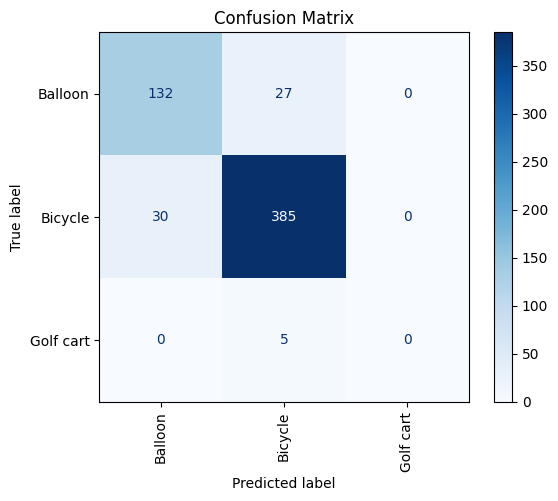

In [ ]:
for i in range(7):
    model_checkpoint_file = f"drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_{i}.keras"
    print(f"Model: {model_checkpoint_file}")

    # load the model
    model = load_model(model_checkpoint_file)

    # check number of paramters
    num_params = model.count_params()
    print("Number of parameters of the model:", num_params)

    # check the test accuracy
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test loss:", test_loss)
    print("Test accuracy:", test_accuracy)

    # print the confusion matrix
    test_generator.reset()
    y_pred = model.predict(test_generator_no_shuffle)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = test_generator_no_shuffle.classes  # True class labels from the generator

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    # Plot the confusion matrix
    class_names = sorted(os.listdir(train_dir))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=90)
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# Initialize lists to store results
import pandas as pd
results_list = []
confusion_matrices = []

# Load and evaluate each model
for i in range(7):
    model_file = f"drive/MyDrive/ComputerVision/models/model_checkpoint_augmented_{i}.keras"
    # Load the trained model
    model = load_model(model_file)

    # Compute the number of parameters of the model
    num_params = model.count_params()

    # Generate predictions for the test set
    test_generator.reset()
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = test_generator.classes  # True class labels from the generator

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
    confusion_matrices.append(conf_matrix)

    # Calculate test accuracy and loss
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Append results to list
    results_list.append({
        "Model File": model_file,
        "Test Accuracy": test_accuracy,
        "Test Loss": test_loss,
        "Number of Parameters": num_params
    })

# Convert lists to DataFrames
results_df = pd.DataFrame(results_list)

# Concatenate confusion matrices
confusion_df = pd.DataFrame(np.sum(confusion_matrices, axis=0), index=class_names, columns=class_names)

19/19 [==============================] - 31s 2s/step - loss: 0.3359 - accuracy: 0.8929


In [ ]:
results_df

Model File  Test Accuracy  \
0  drive/MyDrive/ComputerVision/models/model_chec...       0.894646   
1  drive/MyDrive/ComputerVision/models/model_chec...       0.896373   
2  drive/MyDrive/ComputerVision/models/model_chec...       0.896373   
3  drive/MyDrive/ComputerVision/models/model_chec...       0.901554   
4  drive/MyDrive/ComputerVision/models/model_chec...       0.887737   
5  drive/MyDrive/ComputerVision/models/model_chec...       0.891192   
6  drive/MyDrive/ComputerVision/models/model_chec...       0.892919   

   Test Loss  Number of Parameters  
0   0.336486              23593859  
1   0.354979              23593859  
2   0.333404              23593859  
3   0.343757              23593859  
4   0.371646              23593859  
5   0.349119              23593859  
6   0.335913              23593859

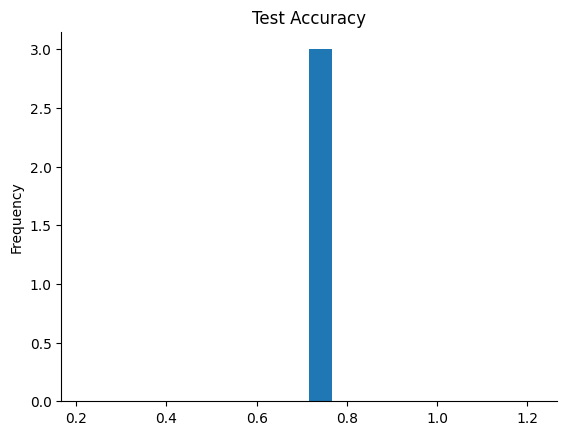

In [ ]:
# @title Test Accuracy

from matplotlib import pyplot as plt
results_df['Test Accuracy'].plot(kind='hist', bins=20, title='Test Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
confusion_df

Balloon  Bicycle  Golf cart
Balloon        782      172          0
Bicycle        164     2326          0
Golf cart        0       30          0

<Figure size 1000x800 with 0 Axes>

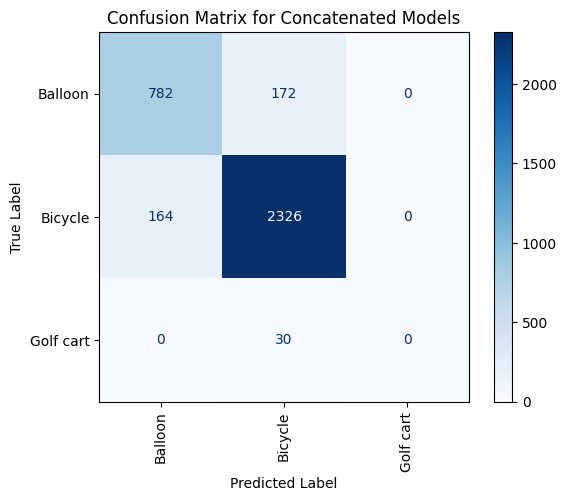

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_df.values, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title('Confusion Matrix for Concatenated Models')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Now lets experiment a bit with the Architecture of the ResNet50 by doing the following step by step and evaluating the models:
before

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32
num_classes = len(os.listdir(train_dir))  # Number of classes

# Data normalization for training and testing
datagen = ImageDataGenerator(rescale=1./255)

# Prepare data generators
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

for i in range(1,5):
  # Load pre-trained ResNet50 model
  base_model = ResNet50(weights='imagenet', include_top=False)

  # Freeze layers up to conv2_block1_out
  freeze_until_layer = 'conv2_block1_out'
  freeze = True
  if i==4:
    freeze = False

  for layer in base_model.layers:

    if layer.name == freeze_until_layer:
      freeze = False
    layer.trainable = not freeze

    # Get the output of conv3_block4_out
  x = base_model.get_layer('conv3_block4_out').output

  # Add convolutional layers
  if i>=1:
    x = Conv2D(512, (3, 3), padding='same', strides=(1, 1))(x)
    x = LeakyReLU()(x)

  if i>=2:
    x = Conv2D(1024, (1, 1), padding='same', strides=(1, 1))(x)
    x = LeakyReLU()(x)

  if i>=3:
    x = Conv2D(1024, (3, 3), padding='same', strides=(2, 2))(x)
    x = LeakyReLU()(x)

    # Add global average pooling and output layer
  x = GlobalAveragePooling2D()(x)
  output = Dense(num_classes, activation='softmax')(x)

    # Construct the model
  model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
  model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Define callbacks
  checkpoint = ModelCheckpoint(f"drive/MyDrive/ComputerVision/models/model_cust_{i}_checkpoint.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
  early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)
  tensorboard = TensorBoard(log_dir=f"drive/MyDrive/ComputerVision/models/logs_modified__{i}", histogram_freq=1)

    # Train the model
  history = model.fit(
      train_generator,
      epochs=10,
      validation_data=test_generator,
      callbacks=[checkpoint, early_stopping, tensorboard]
  )

  # Evaluate the model on test set
  test_loss, test_accuracy = model.evaluate(test_generator)
  print("Test loss Model",i,": ", test_loss)
  print("Test accuracy: ", test_accuracy)

Found 2308 images belonging to 3 classes.
Found 579 images belonging to 3 classes.
Epoch 1/10
73/73 [==============================] - ETA: 0s - loss: 13.3124 - accuracy: 0.8263
Epoch 1: val_accuracy improved from -inf to 0.27461, saving model to drive/MyDrive/ComputerVision/models/model_cust_4_checkpoint.keras
73/73 [==============================] - 646s 9s/step - loss: 13.3124 - accuracy: 0.8263 - val_loss: 7.5771 - val_accuracy: 0.2746
Epoch 2/10
73/73 [==============================] - ETA: 0s - loss: 0.7550 - accuracy: 0.9185
Epoch 2: val_accuracy did not improve from 0.27461
73/73 [==============================] - 665s 9s/step - loss: 0.7550 - accuracy: 0.9185 - val_loss: 1.3762 - val_accuracy: 0.2746
Epoch 3/10
73/73 [==============================] - ETA: 0s - loss: 0.2113 - accuracy: 0.9424
Epoch 3: val_accuracy improved from 0.27461 to 0.71848, saving model to drive/MyDrive/ComputerVision/models/model_cust_4_checkpoint.keras
73/73 [==============================] - 617s 8s/

Plot the confusion matrices for the models with the different architectures.

Model: drive/MyDrive/ComputerVision/models/model_cust_1_checkpoint.keras
Number of parameters of the model: 3821443
19/19 [==============================] - 29s 1s/step - loss: 1.4859 - accuracy: 0.7168
Test loss: 1.4859296083450317
Test accuracy: 0.7167530059814453
19/19 [==============================] - 27s 1s/step


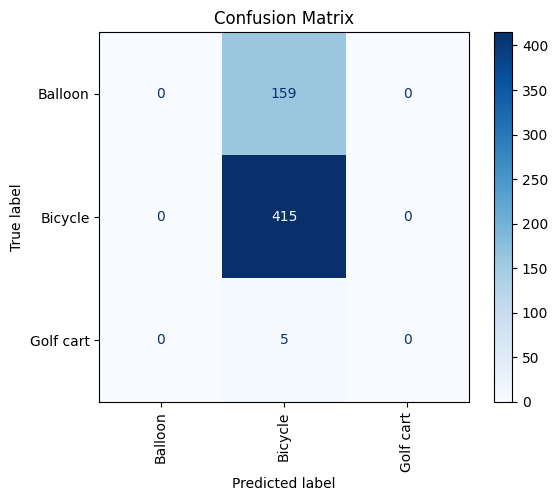

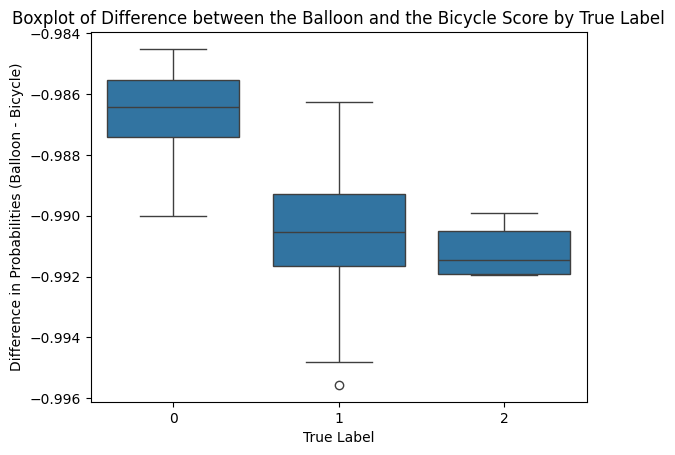

Model: drive/MyDrive/ComputerVision/models/model_cust_2_checkpoint.keras
Number of parameters of the model: 4348291
19/19 [==============================] - 30s 2s/step - loss: 1.7048 - accuracy: 0.7168
Test loss: 1.7048431634902954
Test accuracy: 0.7167530059814453
19/19 [==============================] - 30s 2s/step


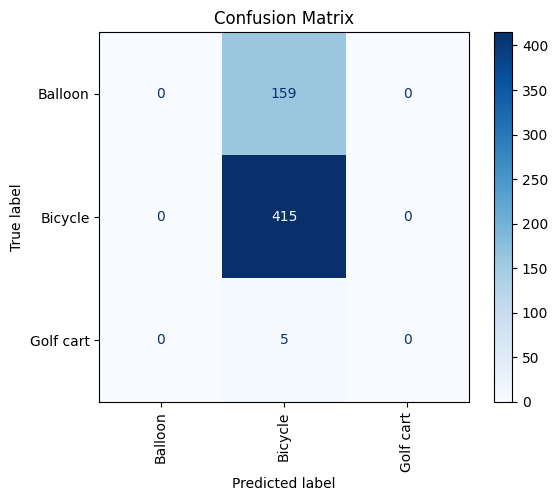

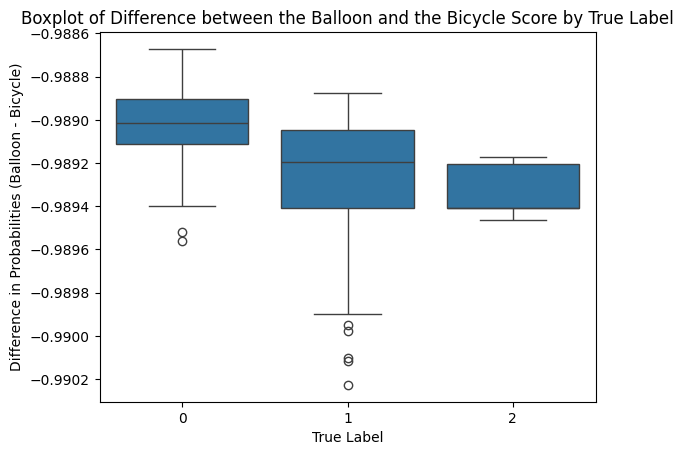

Model: drive/MyDrive/ComputerVision/models/model_cust_3_checkpoint.keras
Number of parameters of the model: 13786499
19/19 [==============================] - 39s 2s/step - loss: 0.9322 - accuracy: 0.7168
Test loss: 0.9321807622909546
Test accuracy: 0.7167530059814453
19/19 [==============================] - 38s 2s/step


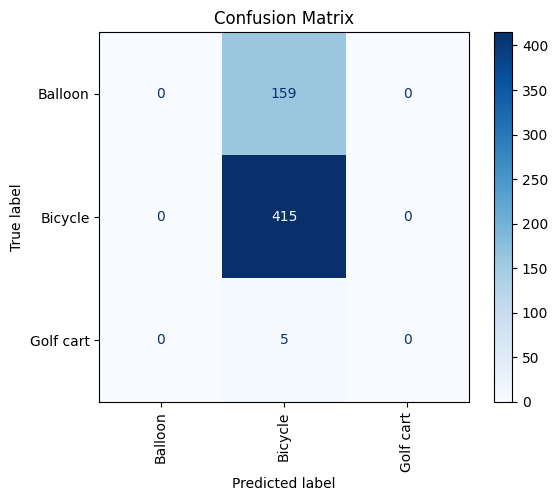

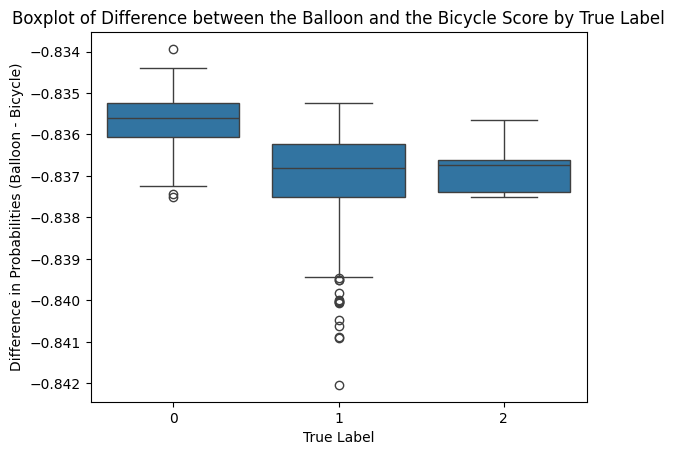

Model: drive/MyDrive/ComputerVision/models/model_cust_4_checkpoint.keras
Number of parameters of the model: 13786499
19/19 [==============================] - 39s 2s/step - loss: 0.6367 - accuracy: 0.7185
Test loss: 0.6366854906082153
Test accuracy: 0.718480110168457
19/19 [==============================] - 38s 2s/step


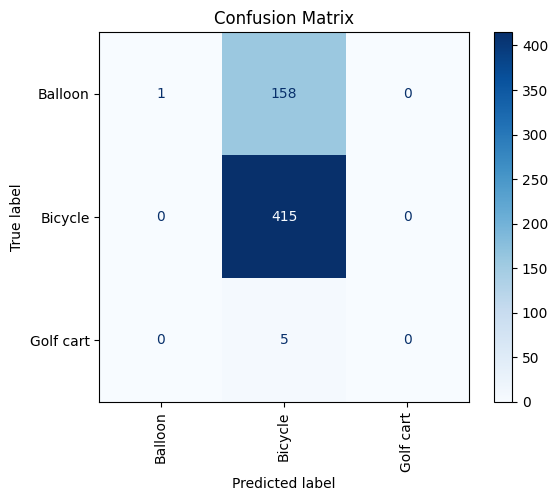

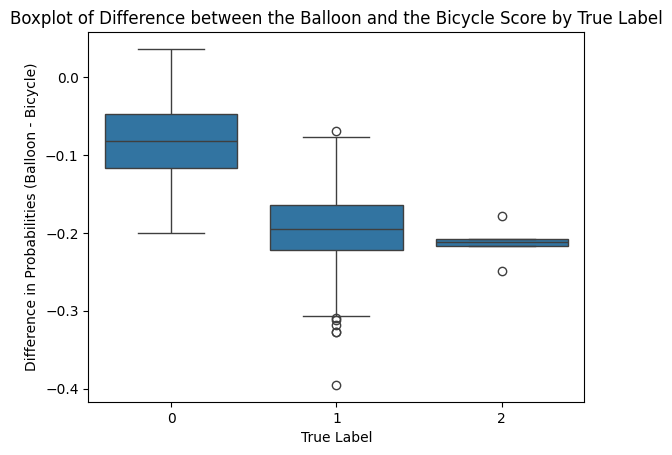

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


for i in range(1,5):
    model_checkpoint_file = f"drive/MyDrive/ComputerVision/models/model_cust_{i}_checkpoint.keras"
    print(f"Model: {model_checkpoint_file}")

    # load the model
    model = load_model(model_checkpoint_file)

    # check number of paramters
    num_params = model.count_params()
    print("Number of parameters of the model:", num_params)

    # check the test accuracy
    test_loss, test_accuracy = model.evaluate(test_generator)
    print("Test loss:", test_loss)
    print("Test accuracy:", test_accuracy)

    # print the confusion matrix
    y_pred = model.predict(test_generator_no_shuffle)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = test_generator_no_shuffle.classes  # True class labels from the generator

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred_classes)

    # Plot the confusion matrix
    class_names = sorted(os.listdir(train_dir))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.xticks(rotation=90)
    plt.title('Confusion Matrix')
    plt.show()



# Assuming y_true contains the true labels and y_pred contains the predicted probabilities
# y_pred[:, 0] represents the predicted probability for the first class
# y_pred[:, 1] represents the predicted probability for the second class

# Assuming you want to plot the difference between the probabilities of the first and second classes
    difference = y_pred[:, 0] - y_pred[:, 1]

# Create a boxplot
    sns.boxplot(x=y_true, y=difference)

# Set labels and title
    plt.xlabel('True Label')
    plt.ylabel('Difference in Probability (Balloon - Bicycle)')
    plt.title('Boxplot of Difference between the Balloon and the Bicycle Score by True Label')

# Show plot
    plt.show()  #the bicycle is always higher than the balloon score, but the difference is significantly lower for the balloons, very weird




In [ ]:
# Initialize lists to store results
results_list = []
confusion_matrices = []

# Load and evaluate each model
for i in range(1,5):
    model_file = f"drive/MyDrive/ComputerVision/models/model_cust_{i}_checkpoint.keras"
    # Load the trained model
    model = load_model(model_file)

    # Compute the number of parameters of the model
    num_params = model.count_params()

    # Generate predictions for the test set
    test_generator.reset()
    y_pred = model.predict(test_generator)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = test_generator.classes  # True class labels from the generator

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
    confusion_matrices.append(conf_matrix)

    # Calculate test accuracy and loss
    test_loss, test_accuracy = model.evaluate(test_generator)

    # Append results to list
    results_list.append({
        "Model File": model_file,
        "Test Accuracy": test_accuracy,
        "Test Loss": test_loss,
        "Number of Parameters": num_params
    })

# Convert lists to DataFrames
results_df = pd.DataFrame(results_list)

# Concatenate confusion matrices
confusion_df = pd.DataFrame(np.sum(confusion_matrices, axis=0), index=class_names, columns=class_names)


19/19 [==============================] - 41s 2s/step - loss: 0.6367 - accuracy: 0.7185


In [ ]:
results_df

Model File  Test Accuracy  \
0  drive/MyDrive/ComputerVision/models/model_cust...       0.716753   
1  drive/MyDrive/ComputerVision/models/model_cust...       0.716753   
2  drive/MyDrive/ComputerVision/models/model_cust...       0.716753   
3  drive/MyDrive/ComputerVision/models/model_cust...       0.718480   

   Test Loss  Number of Parameters  
0   1.485930               3821443  
1   1.704843               4348291  
2   0.932181              13786499  
3   0.636685              13786499

<Figure size 1000x800 with 0 Axes>

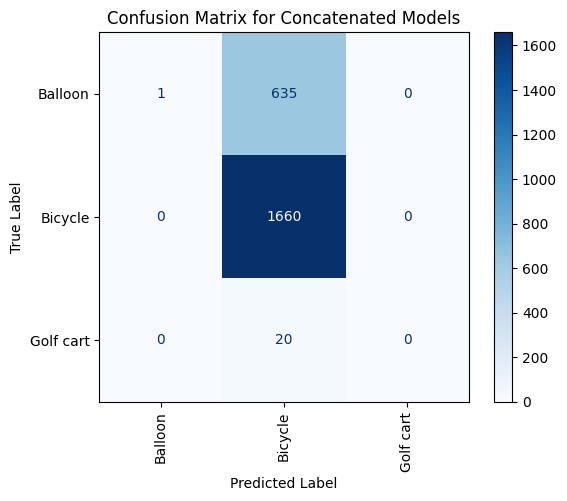

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_df.values, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
plt.title('Confusion Matrix for Concatenated Models')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Activation Map

Now we want to test classify some new images.

In [ ]:
import numpy as np
# Load your pre-trained model
model_checkpoint_file = "drive/MyDrive/ComputerVision/models/model_og_checkpoint.keras"
model = tf.keras.models.load_model(model_checkpoint_file)

### Gradient Weighted Class Activation Map
This is based on taking the gradient with respect to the output of the last convoluational layer. It is not the best / most straight forwarad method to get a Class Activation Map, because our CNN has a Global Average Pooling layer before the classifation layer.

The class visualized is the predicted class.

This method was actually developed for models that *don't* have a Global Average Pooling layer.

The second method below uses the weights of the last layer to weight the feature maps of the last convolutional layer. This method instead, for every feature map, takes the derivate of the output (the likelihood of the selected class) with respect to the feature map. Than it takes the average of this derivative. This is then used as the weight for the feature map.

The results are similar but not identical.

In [ ]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras

# Display
from IPython.display import Image, display
import matplotlib as mpl
import matplotlib.pyplot as plt

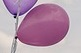

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (img_height, img_width)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "conv5_block3_out"

# The local path to our target image
img_path = 'drive/MyDrive/ComputerVision/ImagesFromInternet/balloons-388973_640.jpg'

display(Image(img_path))

In [ ]:
model_checkpoint_file

NameError: name 'model_checkpoint_file' is not defined

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    #last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
from tensorflow.keras.models import load_model

#load model
model = load_model("drive/MyDrive/ComputerVision/models/model_og_checkpoint.keras")

# Remove last layer's softmax
model.layers[-1].activation = None

1/1 [==============================] - 1s 1s/step


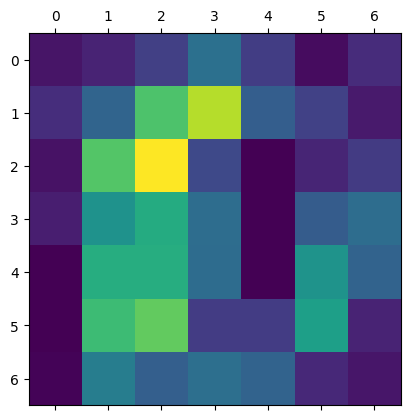

In [ ]:

# Prepare image
img_array = preprocess_input(get_img_array(img_path, size=img_size))

# Load the model using TensorFlow/Keras
model = load_model(model_path)

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array,model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()



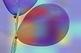

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)

In [ ]:
preds

array([[-2.224767 ,  3.213468 , -3.3858783]], dtype=float32)

### Class Activation Map without the Gradient
Here we take the output from the last convolutional layer and add the featuremaps together, weighed by the weights for the selected class.
This is possible because our model uses a Global Average Pooling layer followed by a Dense layer for classification. The Global Average Pooling maps every feature map to a single value, therefore there is one weight per feature map and class.

In [ ]:
#load the model
model = tf.keras.models.load_model("drive/MyDrive/ComputerVision/models/model_og_checkpoint.keras")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import keras


from IPython.display import Image, display
import matplotlib as mpl

#this function returns the CAM for the desired class and the class prediction, if no desired class is specified, it returns the CAM for the predicted class
def generate_CAM(model, img_path, last_conv_layer_name,size,class_index = None):
    # Load the image
    img = image.load_img(img_path, target_size=size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

    # Create a model without the final dense layer
    cam_model = Model(inputs=model.input, outputs=[model.get_layer(last_conv_layer_name).output, model.output])

    # Get the feature map and the output of the model
    last_conv_output, model_output = cam_model.predict(img_array)

    # if no class_index was specified, we just take the predicted class
    if not class_index:
      class_index = np.argmax(model_output)

    # Compute the CAM by multiplying the output weights by the last convolutional layer activations
    cam = np.dot(last_conv_output[0], model.layers[-1].get_weights()[0][:, class_index])

    # Normalize the CAM
    cam = np.maximum(cam, 0) #should not take negative values
    if np.max(cam)>0:
      cam /= np.max(cam) #makes sure the values are between 0 and 1

    # Generate heatmap
    heatmap = np.squeeze(cam)


    return heatmap, model_output

def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = mpl.colormaps["jet"]

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


Model:  model_checkpoint_augmented_0.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[9.4612956e-01 5.3870339e-02 1.5072840e-07]]


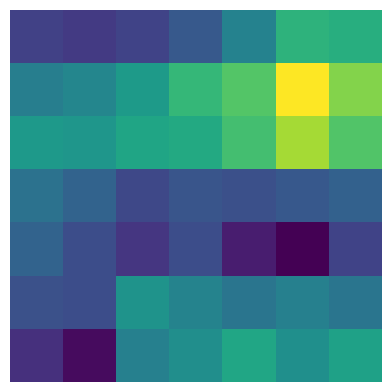

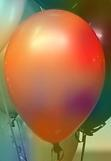

Model:  model_checkpoint_augmented_1.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 2s 2s/step
Prediciton for the classes:  [[3.5117906e-01 6.4881927e-01 1.6328012e-06]]


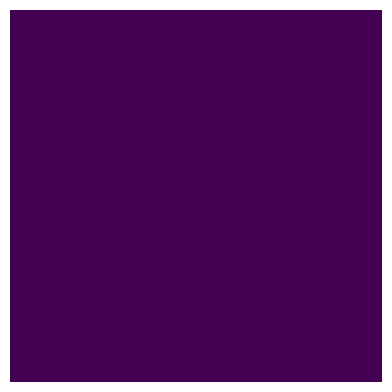

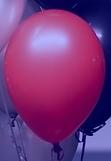

Model:  model_checkpoint_augmented_2.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.4165804e-01 8.5834110e-01 7.7683870e-07]]


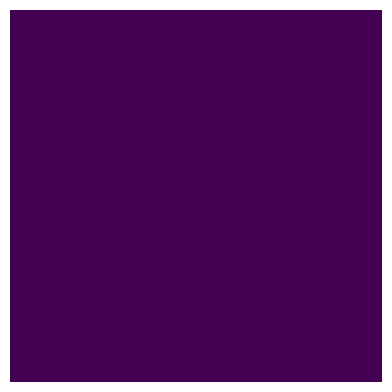

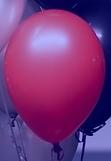

Model:  model_checkpoint_augmented_3.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[6.012787e-01 3.987176e-01 3.684968e-06]]


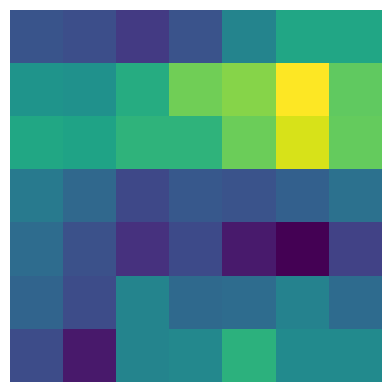

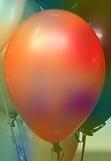

Model:  model_checkpoint_augmented_4.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[6.6821568e-04 9.9679714e-01 2.5346733e-03]]


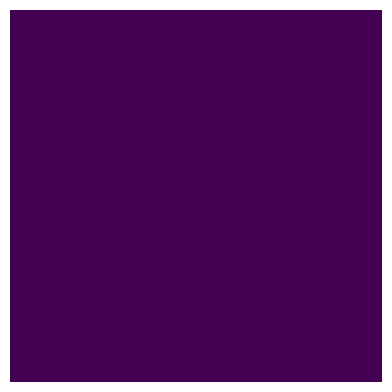

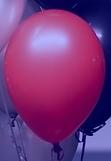

Model:  model_checkpoint_augmented_5.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 2s 2s/step
Prediciton for the classes:  [[0.9881193  0.00931354 0.00256719]]


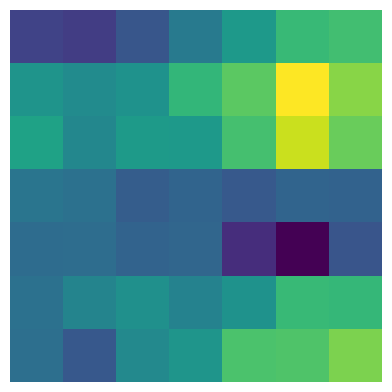

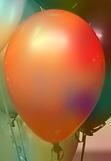

Model:  model_checkpoint_augmented_6.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[9.374989e-01 6.243082e-02 7.034296e-05]]


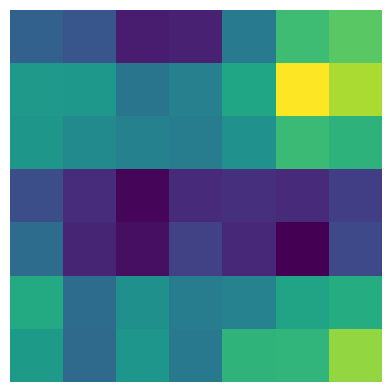

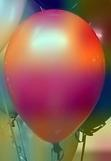

Model:  model_cust_1_checkpoint.keras
Last Convolutational Layer:  conv2d_2
1/1 [==============================] - 1s 576ms/step
Prediciton for the classes:  [[9.9484009e-01 5.1599438e-03 6.8255146e-10]]


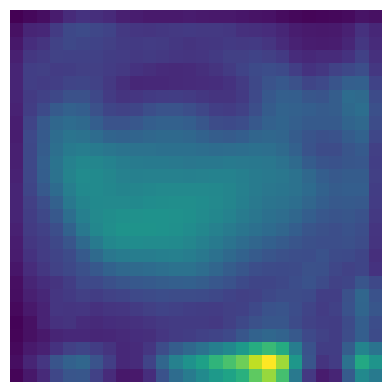

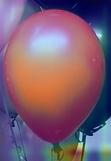

Model:  model_cust_2_checkpoint.keras
Last Convolutational Layer:  conv2d_4
1/1 [==============================] - 1s 565ms/step
Prediciton for the classes:  [[8.1146115e-01 1.8828656e-01 2.5229022e-04]]


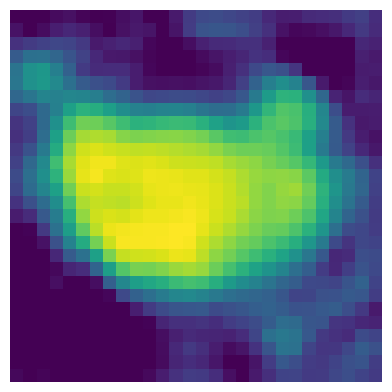

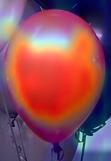

Model:  model_cust_3_checkpoint.keras
Last Convolutational Layer:  conv2d_7
1/1 [==============================] - 1s 580ms/step
Prediciton for the classes:  [[1.5876124e-02 9.8412389e-01 4.9535575e-12]]


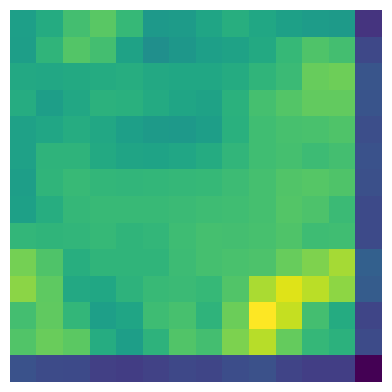

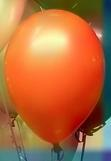

Model:  model_og_checkpoint.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[0.00279521 0.9911143  0.00609047]]


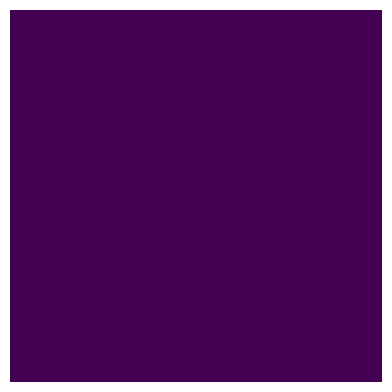

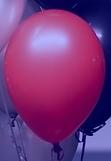

Model:  model_cust_4_checkpoint.keras
Last Convolutational Layer:  conv2d_10
1/1 [==============================] - 1s 685ms/step
Prediciton for the classes:  [[0.9067189  0.09328103 0.        ]]


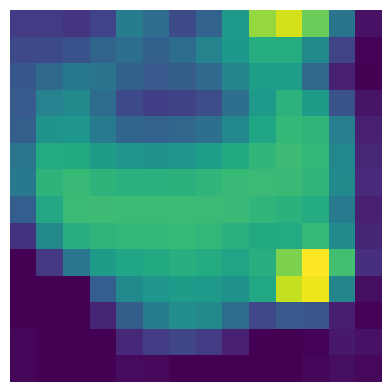

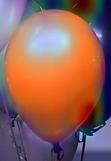

In [ ]:
from tensorflow.keras.models import load_model
import os

# Specify the folder containing the .keras models
folder_path = "drive/MyDrive/ComputerVision/models"

# Path to your image
img_path = 'drive/MyDrive/ComputerVision/ImagesFromInternet/balloons-1331564_640.jpg'

 # Specify the class index for which you want to generate the CAM
class_index = 0

#function to get the last convolutional layer of a model
def get_last_conv_layer_name(model):
    last_conv_layer_name = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer_name = layer.name
            break
    return last_conv_layer_name


# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".keras"):
        # Construct the full path to the model file
        print("Model: ",file_name)
        model_path = os.path.join(folder_path, file_name)

        # Load the model using TensorFlow/Keras
        model = load_model(model_path)


        # Name of the last convolutional layer in your model
        last_conv_layer_name = get_last_conv_layer_name(model)
        print("Last Convolutational Layer: ",last_conv_layer_name)
        # Generate CAM
        cam, prediction = generate_CAM(model, img_path, last_conv_layer_name,size = (img_height, img_width),class_index = class_index)

        # Plot the CAM image
        print("Prediciton for the classes: ",prediction)
        plt.matshow(cam)
        plt.axis('off')
        plt.show()

        #show overlay with actual image
        save_and_display_gradcam(img_path, cam)

Model:  model_checkpoint_augmented_0.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.5832391e-06 9.9999845e-01 1.1383877e-10]]


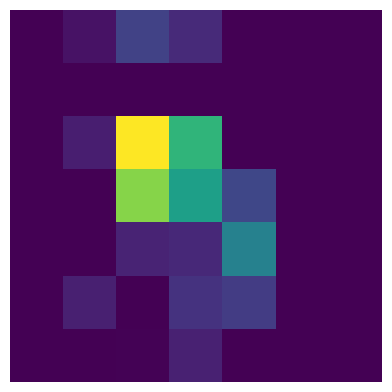

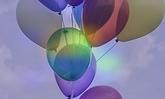

Model:  model_checkpoint_augmented_1.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[2.0067887e-06 9.9999797e-01 7.9933157e-11]]


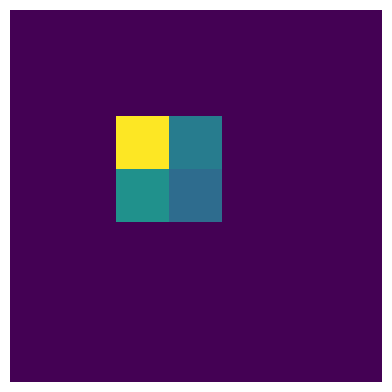

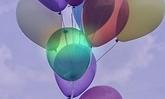

Model:  model_checkpoint_augmented_2.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[2.5033084e-09 1.0000000e+00 8.3710582e-12]]


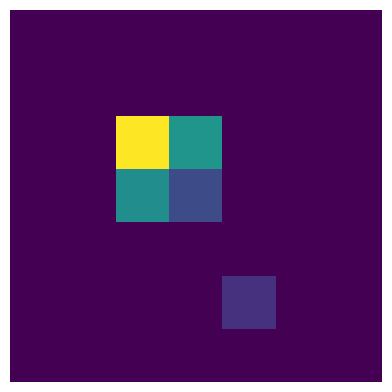

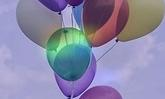

Model:  model_checkpoint_augmented_3.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 2s 2s/step
Prediciton for the classes:  [[1.4759826e-08 1.0000000e+00 8.3579758e-12]]


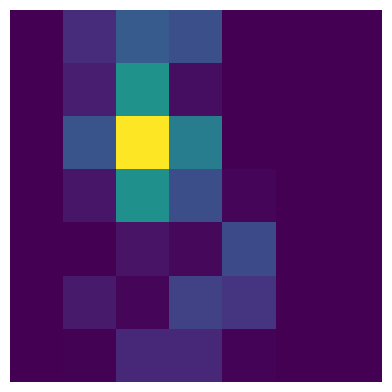

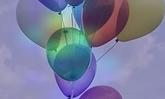

Model:  model_checkpoint_augmented_4.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[5.519126e-10 9.999994e-01 6.205673e-07]]


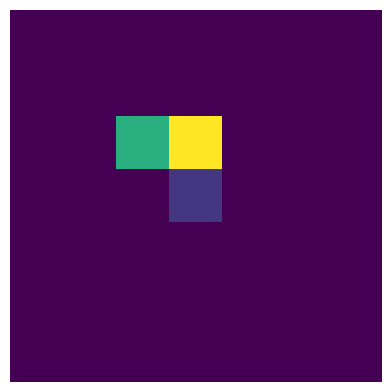

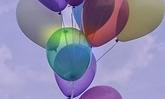

Model:  model_checkpoint_augmented_5.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[2.4203018e-05 9.9993980e-01 3.6030491e-05]]


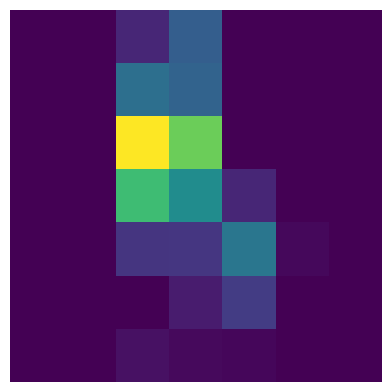

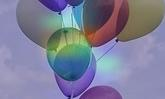

Model:  model_checkpoint_augmented_6.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[4.8862398e-04 9.9948394e-01 2.7428066e-05]]


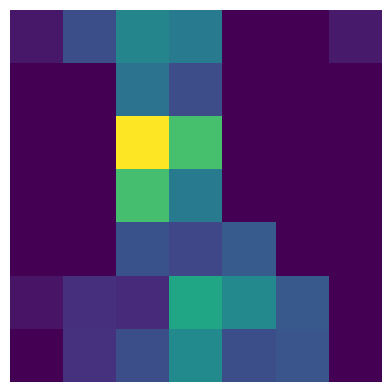

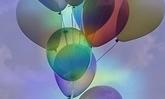

Model:  model_cust_1_checkpoint.keras
Last Convolutational Layer:  conv2d_2
1/1 [==============================] - 1s 561ms/step
Prediciton for the classes:  [[9.8552161e-01 1.4478377e-02 1.7588734e-08]]


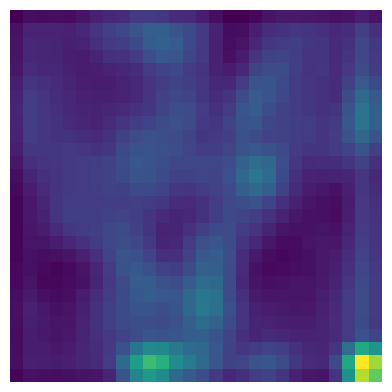

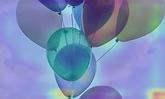

Model:  model_cust_2_checkpoint.keras
Last Convolutational Layer:  conv2d_4
1/1 [==============================] - 1s 698ms/step
Prediciton for the classes:  [[0.7257227  0.27304092 0.00123645]]


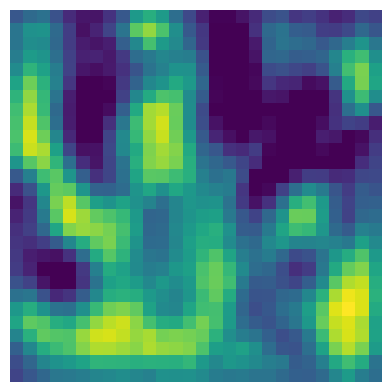

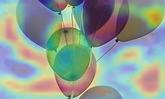

Model:  model_cust_3_checkpoint.keras
Last Convolutational Layer:  conv2d_7
1/1 [==============================] - 1s 646ms/step
Prediciton for the classes:  [[1.2133644e-02 9.8786628e-01 1.8898368e-12]]


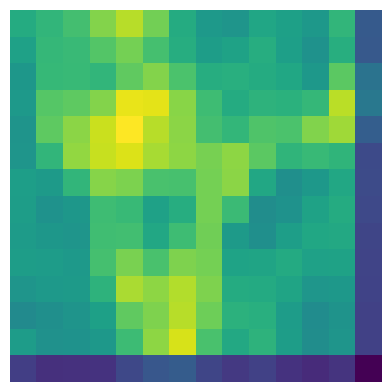

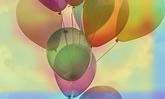

Model:  model_og_checkpoint.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[5.9219269e-09 9.9999905e-01 9.6178576e-07]]


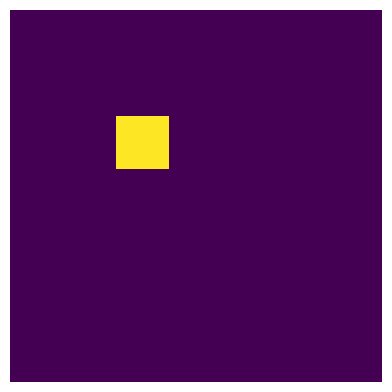

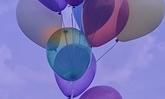

Model:  model_cust_4_checkpoint.keras
Last Convolutational Layer:  conv2d_10
1/1 [==============================] - 1s 657ms/step
Prediciton for the classes:  [[7.6208818e-01 2.3791172e-01 4.7409483e-08]]


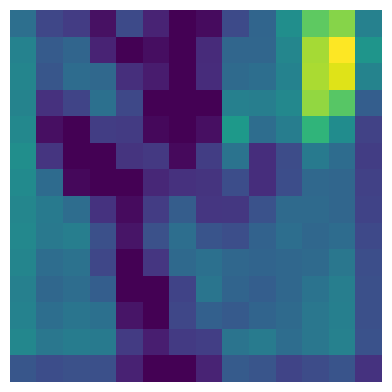

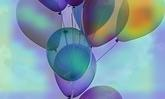

In [ ]:
from tensorflow.keras.models import load_model
import os

# Specify the folder containing the .keras models
folder_path = "drive/MyDrive/ComputerVision/models"

# Path to your image
img_path = 'drive/MyDrive/ComputerVision/ImagesFromInternet/balloons-388973_640.jpg'

 # Specify the class index for which you want to generate the CAM
class_index = 0

#function to get the last convolutional layer of a model
def get_last_conv_layer_name(model):
    last_conv_layer_name = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer_name = layer.name
            break
    return last_conv_layer_name


# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".keras"):
        # Construct the full path to the model file
        print("Model: ",file_name)
        model_path = os.path.join(folder_path, file_name)

        # Load the model using TensorFlow/Keras
        model = load_model(model_path)


        # Name of the last convolutional layer in your model
        last_conv_layer_name = get_last_conv_layer_name(model)
        print("Last Convolutational Layer: ",last_conv_layer_name)
        # Generate CAM
        cam, prediction = generate_CAM(model, img_path, last_conv_layer_name,size = (img_height, img_width),class_index = class_index)

        # Plot the CAM image
        print("Prediciton for the classes: ",prediction)
        plt.matshow(cam)
        plt.axis('off')
        plt.show()

        #show overlay with actual image
        save_and_display_gradcam(img_path, cam)

Model:  model_checkpoint_augmented_0.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[3.0364495e-04 9.9969566e-01 7.1096059e-07]]


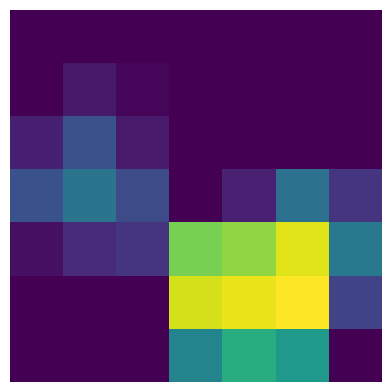

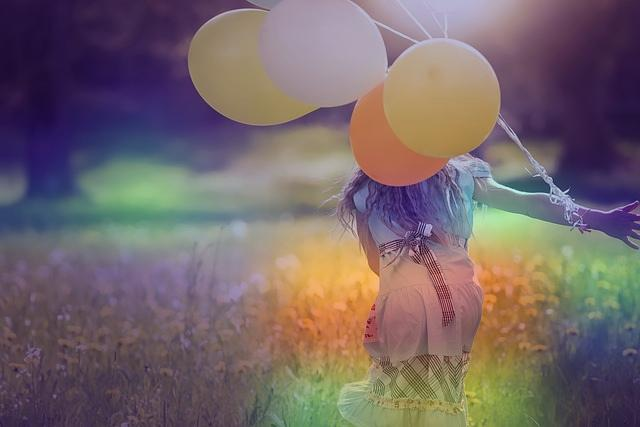

Model:  model_checkpoint_augmented_1.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[5.3011854e-07 9.9999952e-01 2.0622382e-09]]


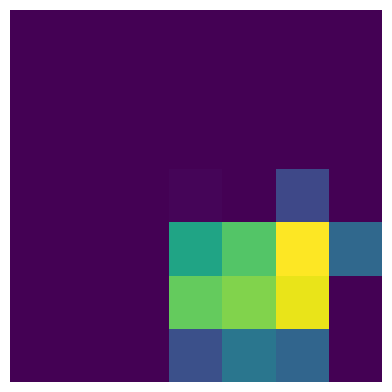

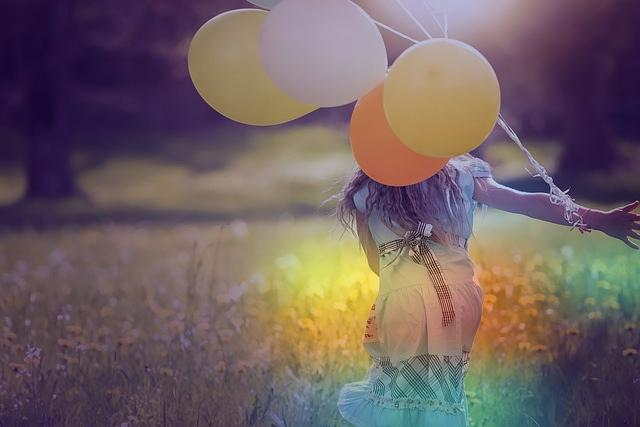

Model:  model_checkpoint_augmented_2.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.9456159e-08 1.0000000e+00 3.6874886e-10]]


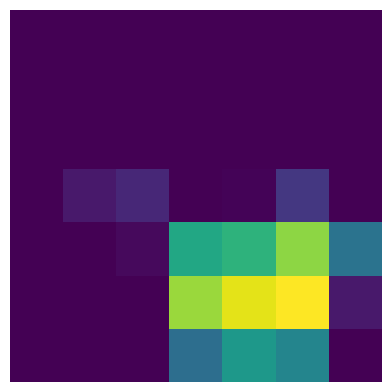

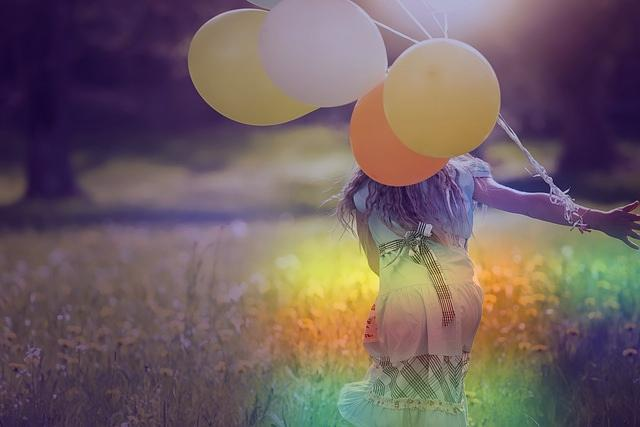

Model:  model_checkpoint_augmented_3.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[7.0553108e-07 9.9999928e-01 3.2319099e-09]]


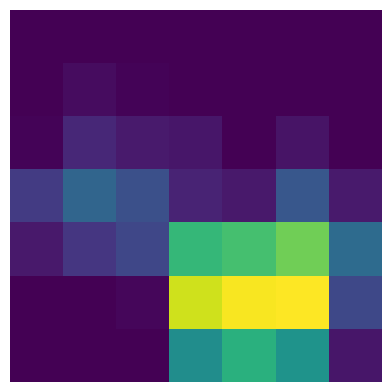

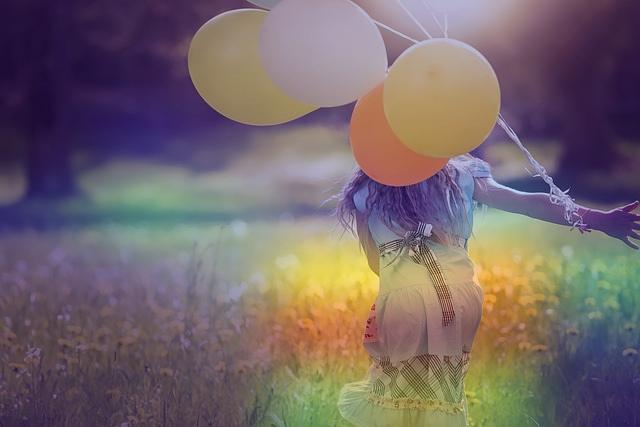

Model:  model_checkpoint_augmented_4.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.4990202e-09 9.9997771e-01 2.2266304e-05]]


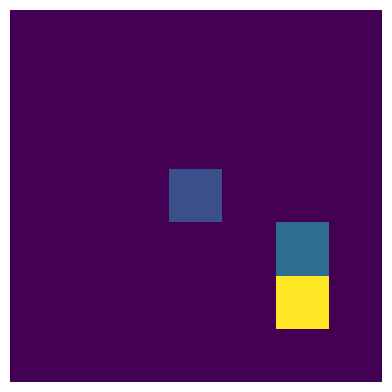

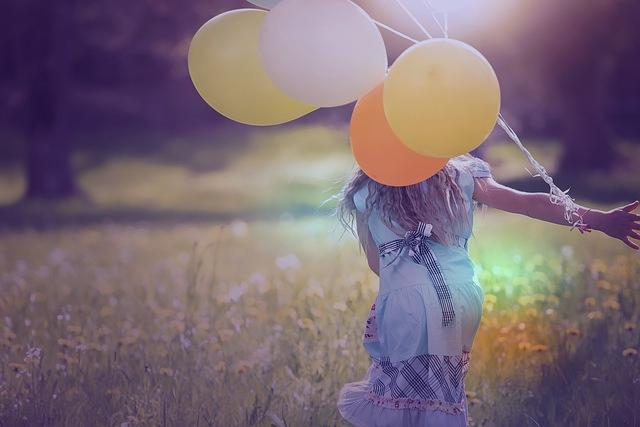

Model:  model_checkpoint_augmented_5.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.3277930e-05 9.8041695e-01 1.9569751e-02]]


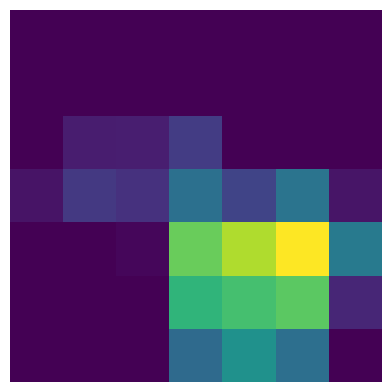

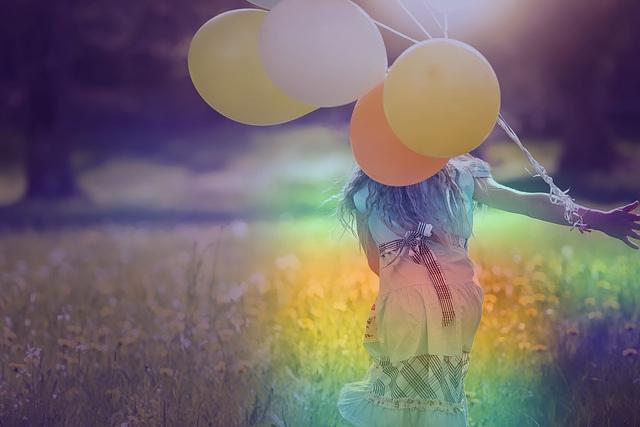

Model:  model_checkpoint_augmented_6.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[2.7327513e-04 9.6004111e-01 3.9685573e-02]]


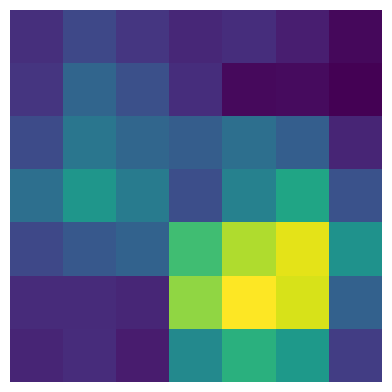

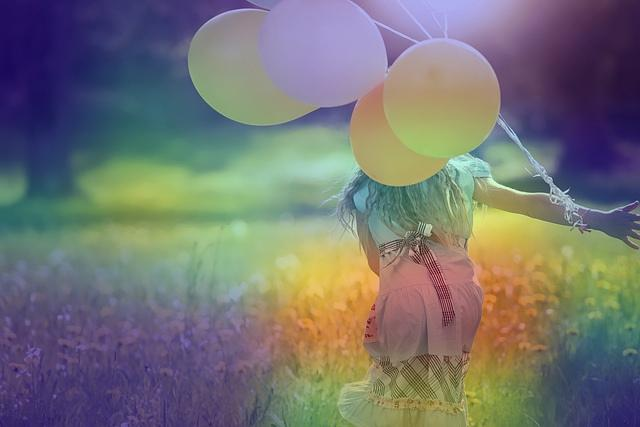

Model:  model_cust_1_checkpoint.keras
Last Convolutational Layer:  conv2d_2
1/1 [==============================] - 1s 608ms/step
Prediciton for the classes:  [[1.20071106e-01 8.79928827e-01 4.28400888e-08]]


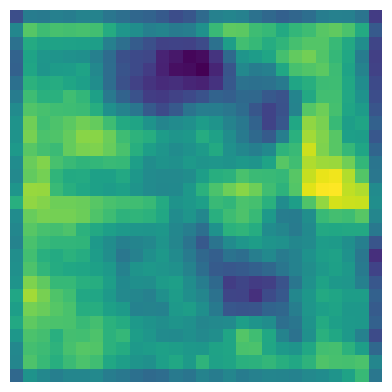

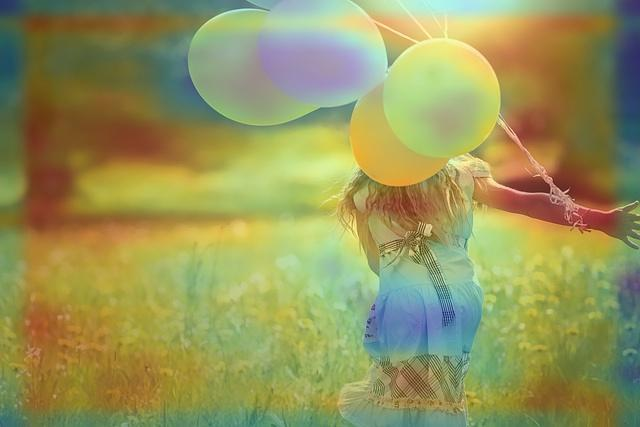

Model:  model_cust_2_checkpoint.keras
Last Convolutational Layer:  conv2d_4
1/1 [==============================] - 1s 589ms/step
Prediciton for the classes:  [[0.05789396 0.93960136 0.00250459]]


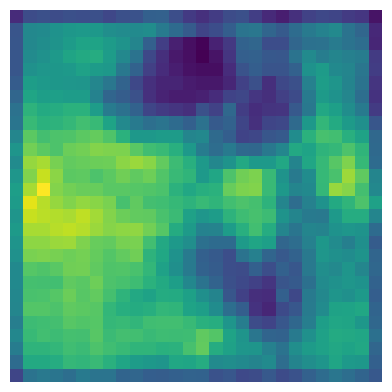

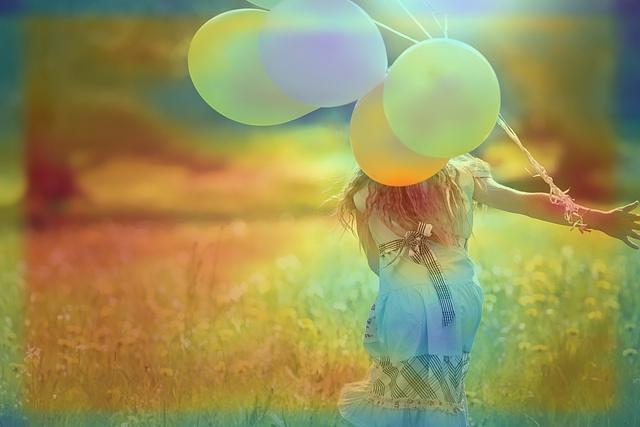

Model:  model_cust_3_checkpoint.keras
Last Convolutational Layer:  conv2d_7
1/1 [==============================] - 1s 608ms/step
Prediciton for the classes:  [[5.7289782e-03 9.9427104e-01 8.1448818e-13]]


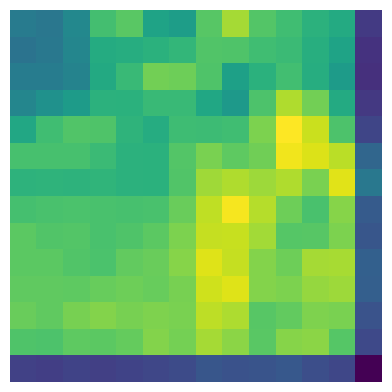

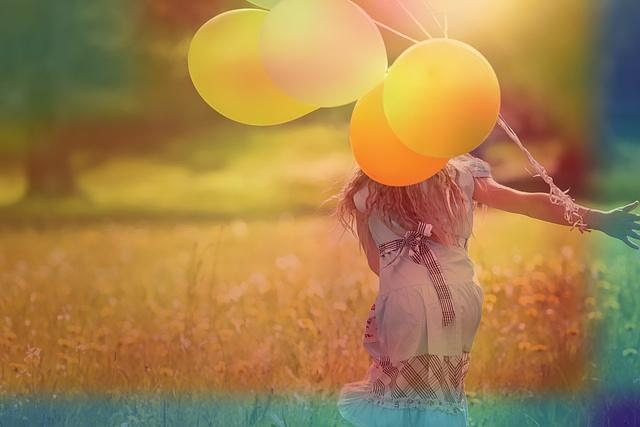

Model:  model_og_checkpoint.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.8887565e-09 9.9999797e-01 2.0377554e-06]]


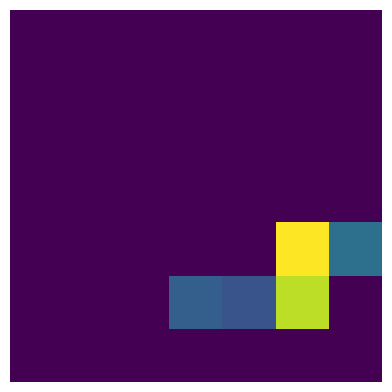

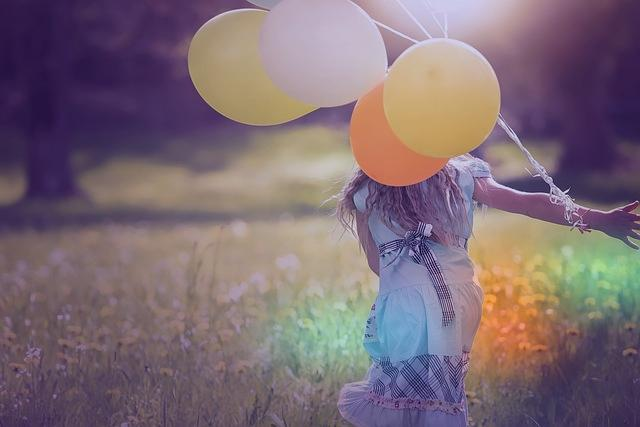

Model:  model_cust_4_checkpoint.keras
Last Convolutational Layer:  conv2d_10
1/1 [==============================] - 1s 723ms/step
Prediciton for the classes:  [[7.5878791e-04 9.9924123e-01 8.3584141e-14]]


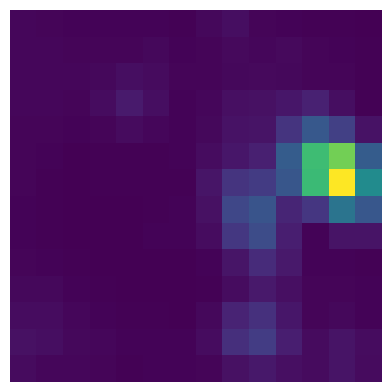

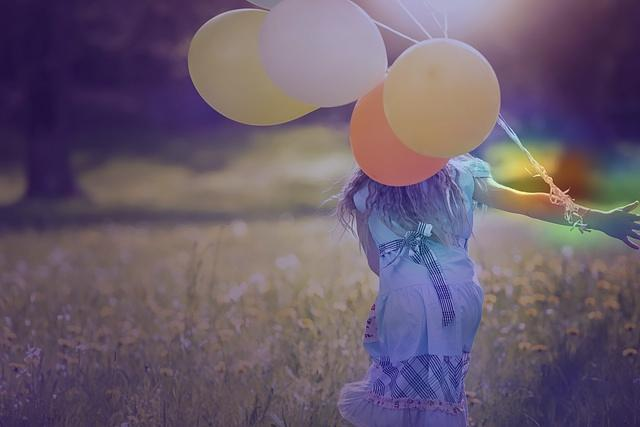

In [ ]:
from tensorflow.keras.models import load_model
import os

# Specify the folder containing the .keras models
folder_path = "drive/MyDrive/ComputerVision/models"

# Path to your image
img_path = 'drive/MyDrive/ComputerVision/ImagesFromInternet/girl-1357485_640.jpg'

 # Specify the class index for which you want to generate the CAM
class_index = 0

#function to get the last convolutional layer of a model
def get_last_conv_layer_name(model):
    last_conv_layer_name = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer_name = layer.name
            break
    return last_conv_layer_name


# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".keras"):
        # Construct the full path to the model file
        print("Model: ",file_name)
        model_path = os.path.join(folder_path, file_name)

        # Load the model using TensorFlow/Keras
        model = load_model(model_path)


        # Name of the last convolutional layer in your model
        last_conv_layer_name = get_last_conv_layer_name(model)
        print("Last Convolutational Layer: ",last_conv_layer_name)
        # Generate CAM
        cam, prediction = generate_CAM(model, img_path, last_conv_layer_name,size = (img_height, img_width),class_index = class_index)

        # Plot the CAM image
        print("Prediciton for the classes: ",prediction)
        plt.matshow(cam)
        plt.axis('off')
        plt.show()

        #show overlay with actual image
        save_and_display_gradcam(img_path, cam)

Model:  model_checkpoint_augmented_0.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.6990885e-04 9.9983001e-01 5.3742813e-08]]


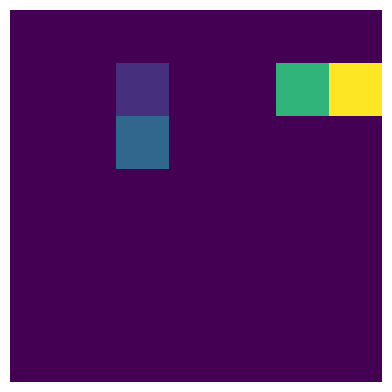

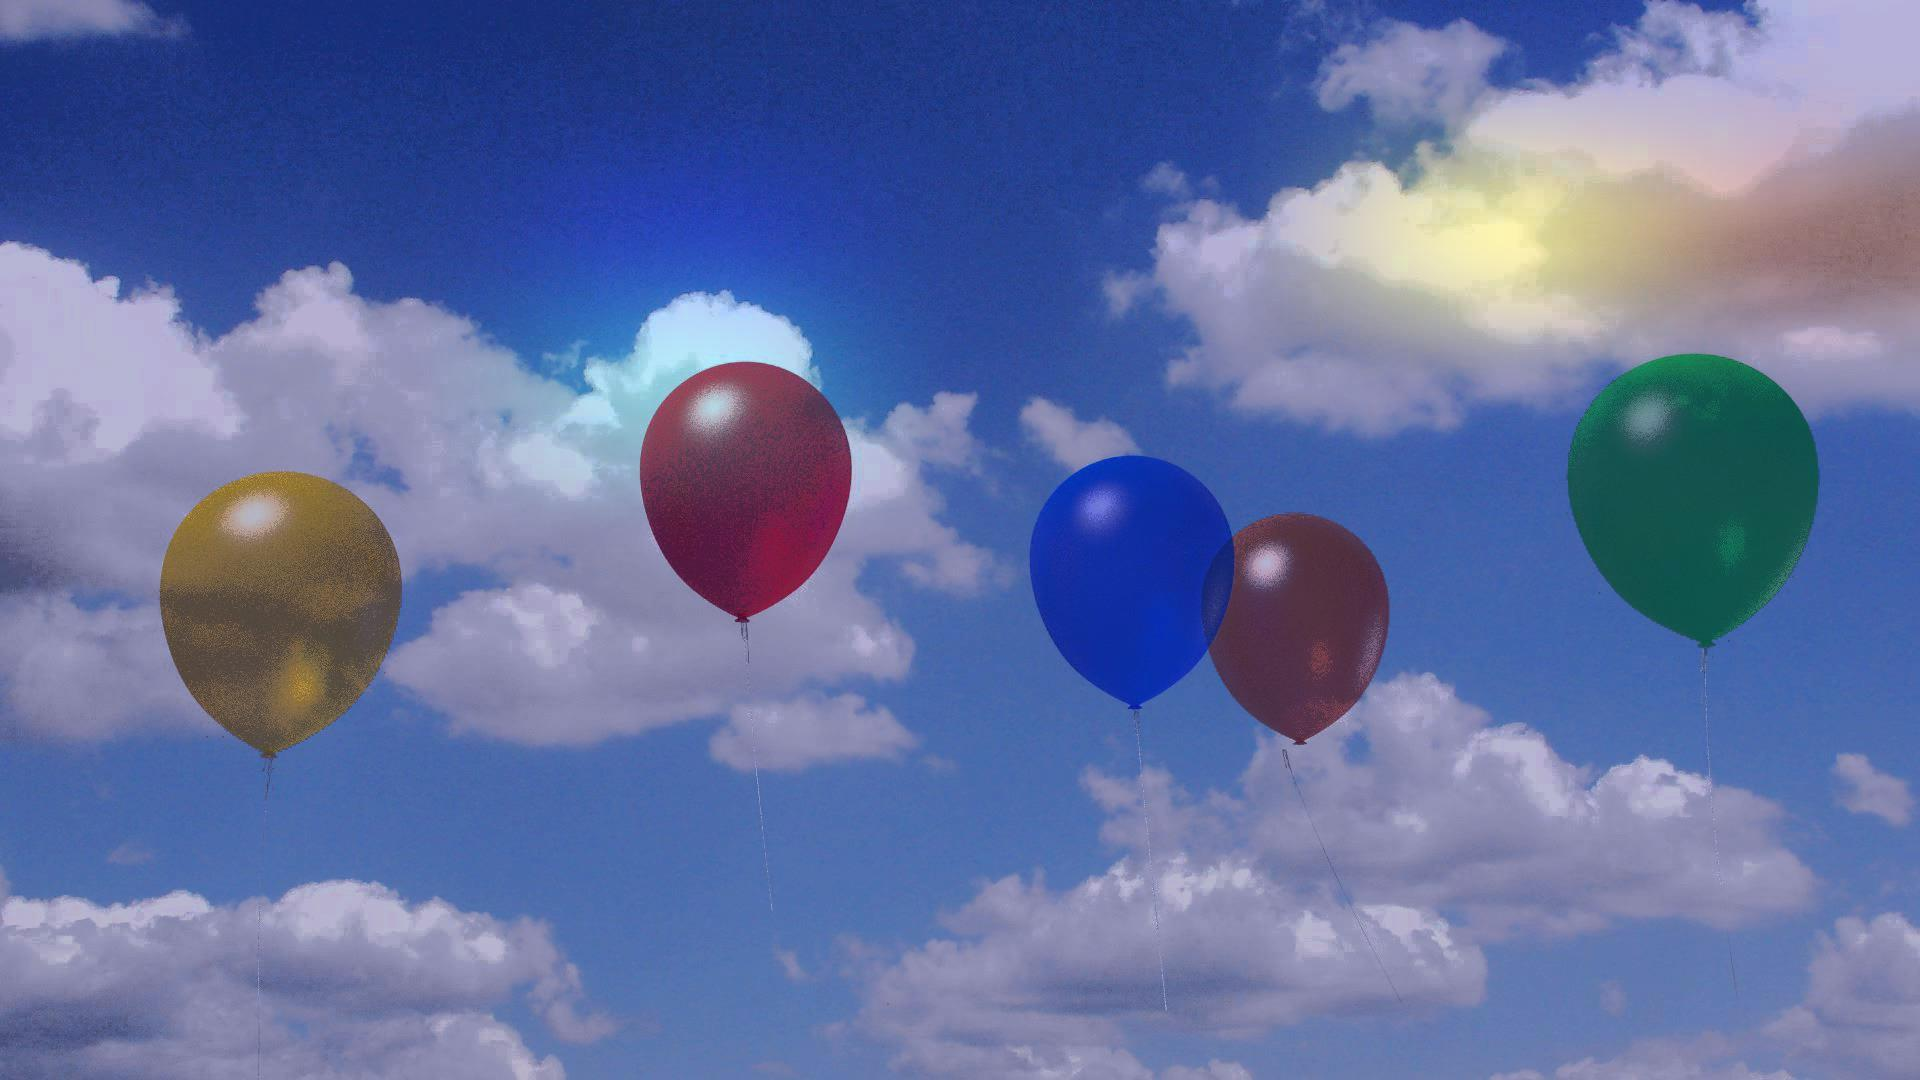

Model:  model_checkpoint_augmented_1.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[7.7884889e-04 9.9922049e-01 6.2732335e-07]]


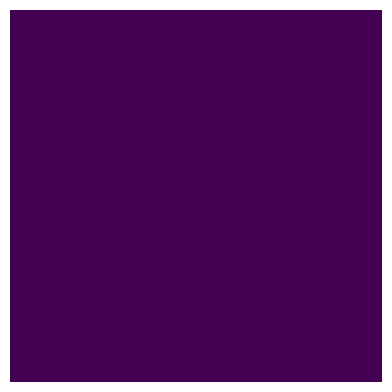

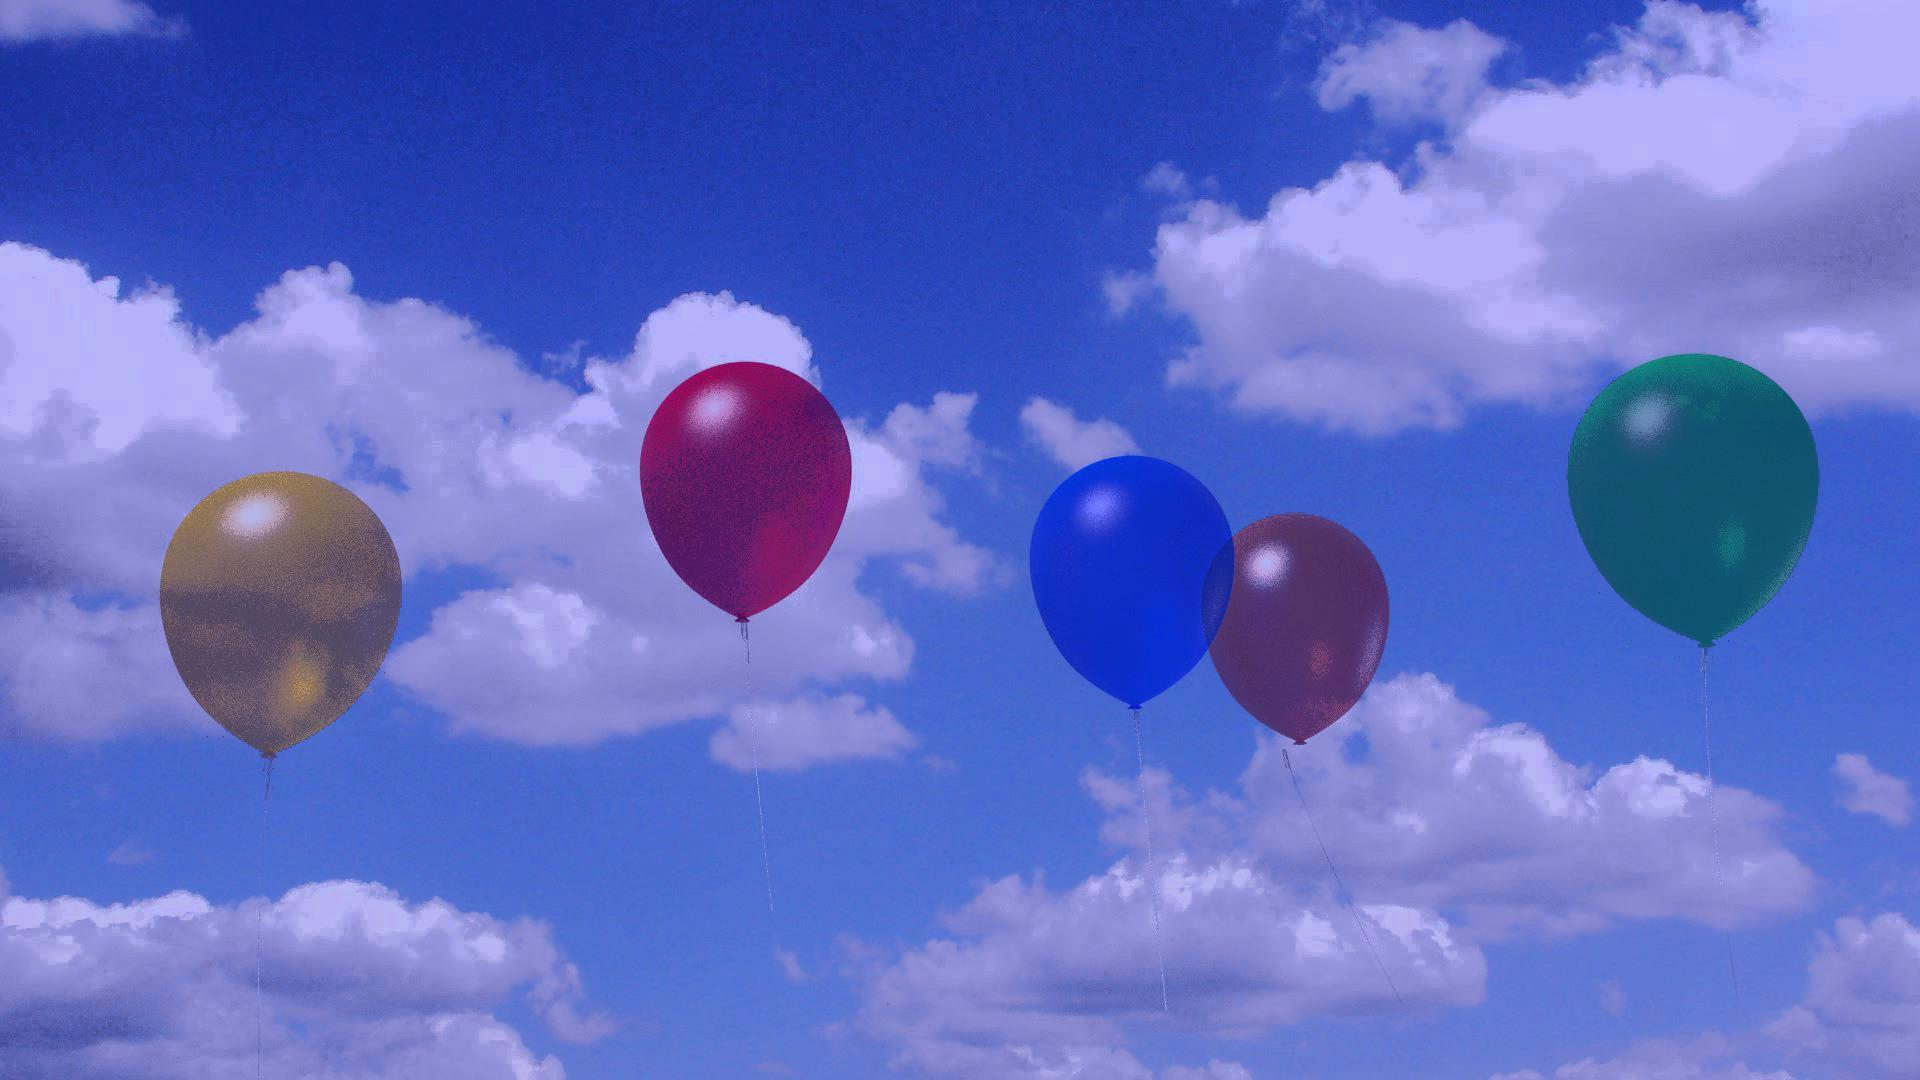

Model:  model_checkpoint_augmented_2.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[7.8863181e-05 9.9991965e-01 1.4871061e-06]]


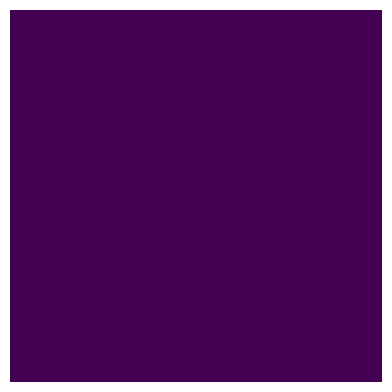

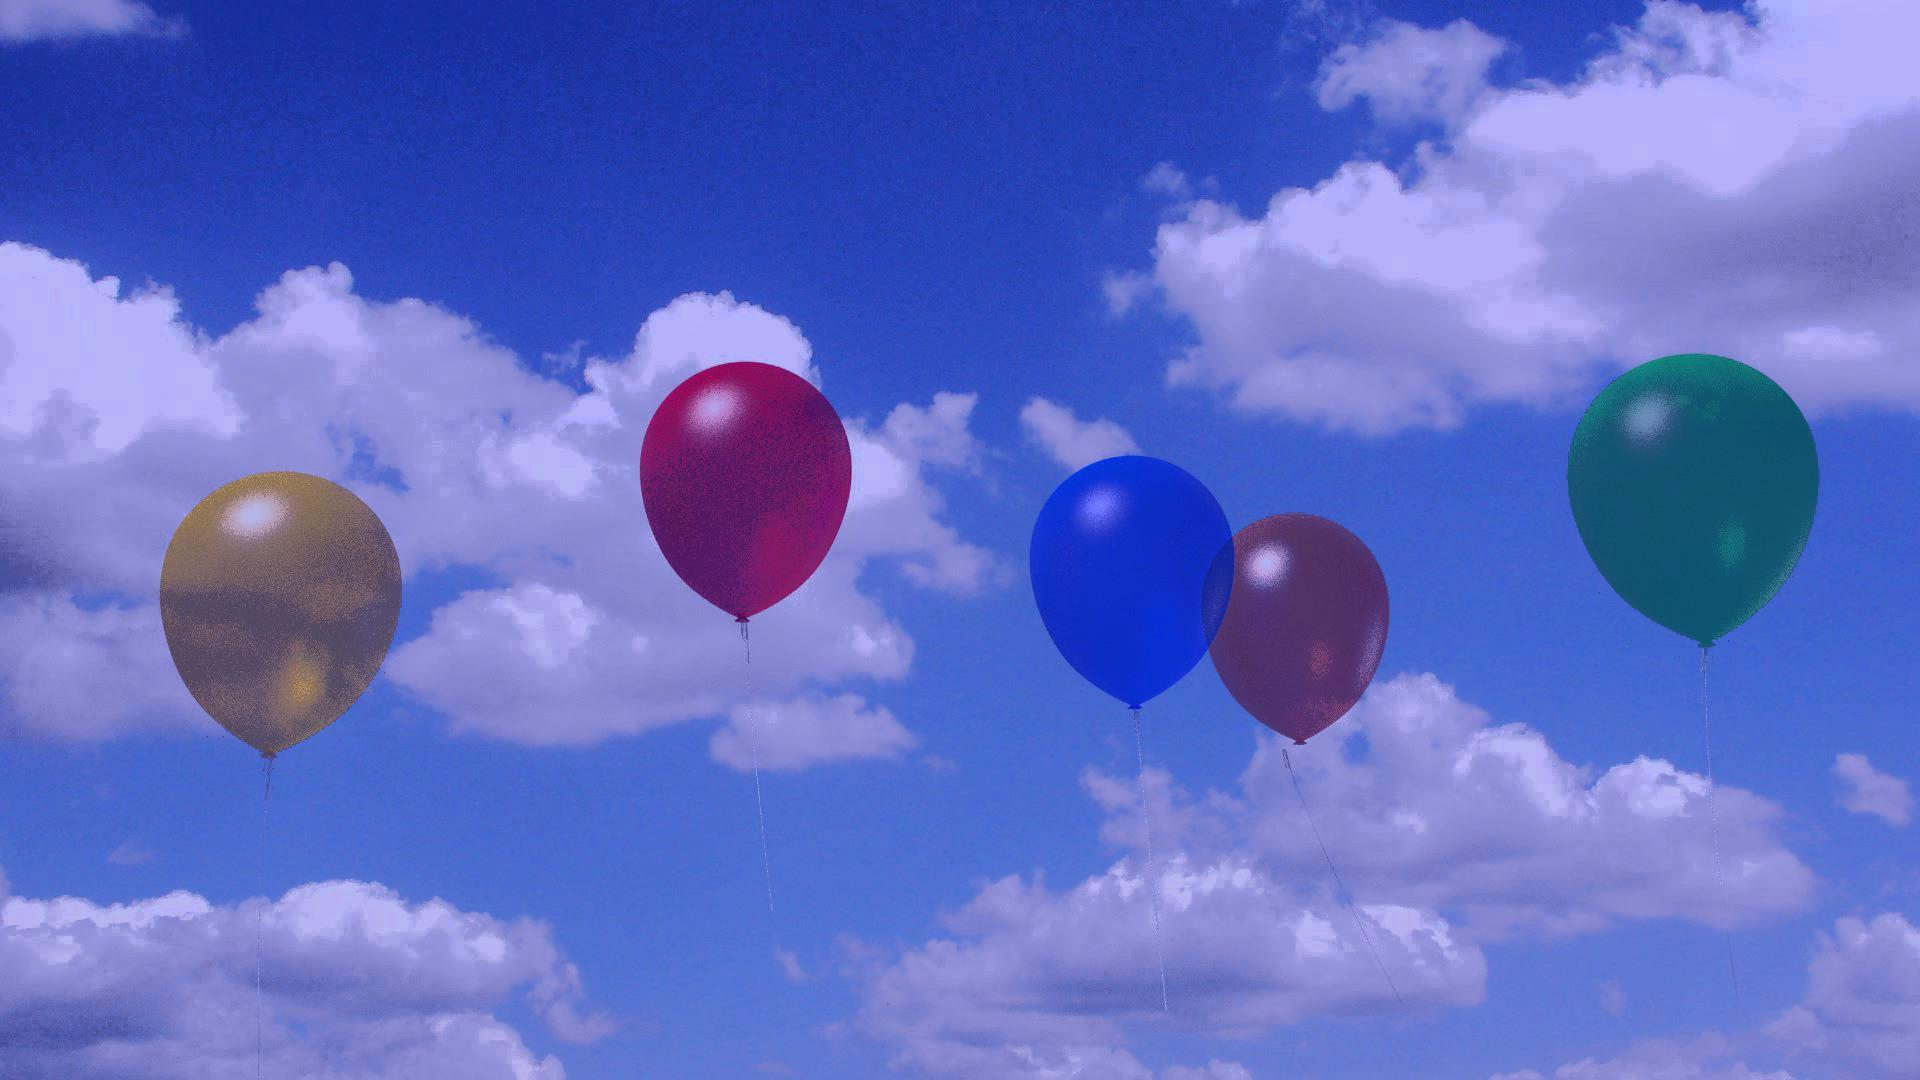

Model:  model_checkpoint_augmented_3.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[8.7180845e-03 9.9128121e-01 7.4927215e-07]]


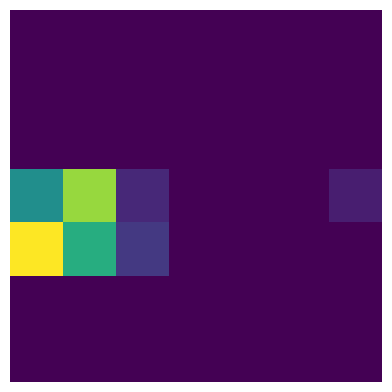

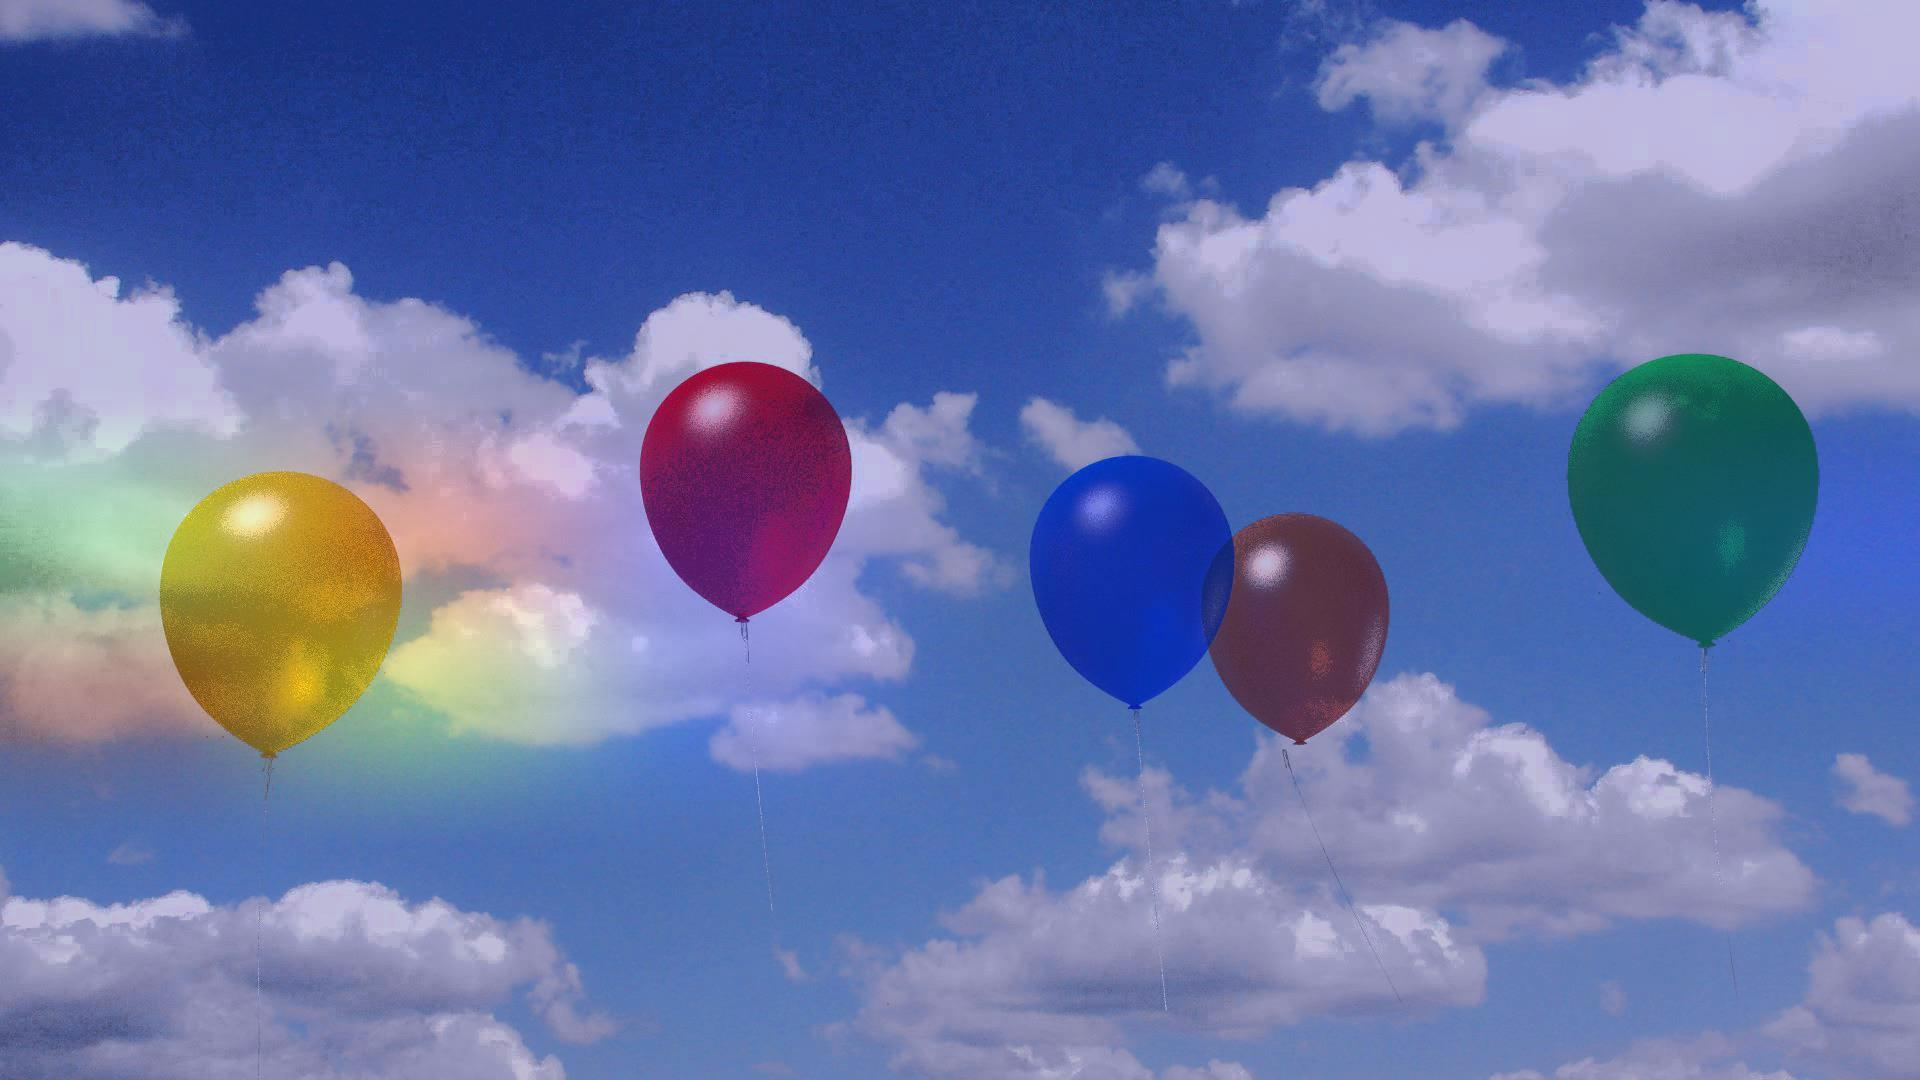

Model:  model_checkpoint_augmented_4.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[5.0167210e-07 9.9652368e-01 3.4758497e-03]]


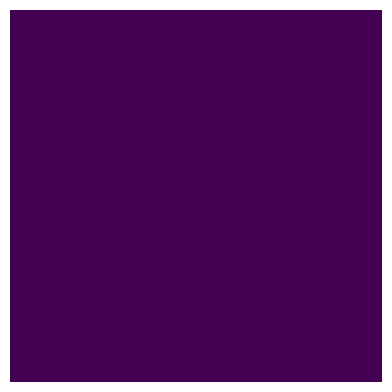

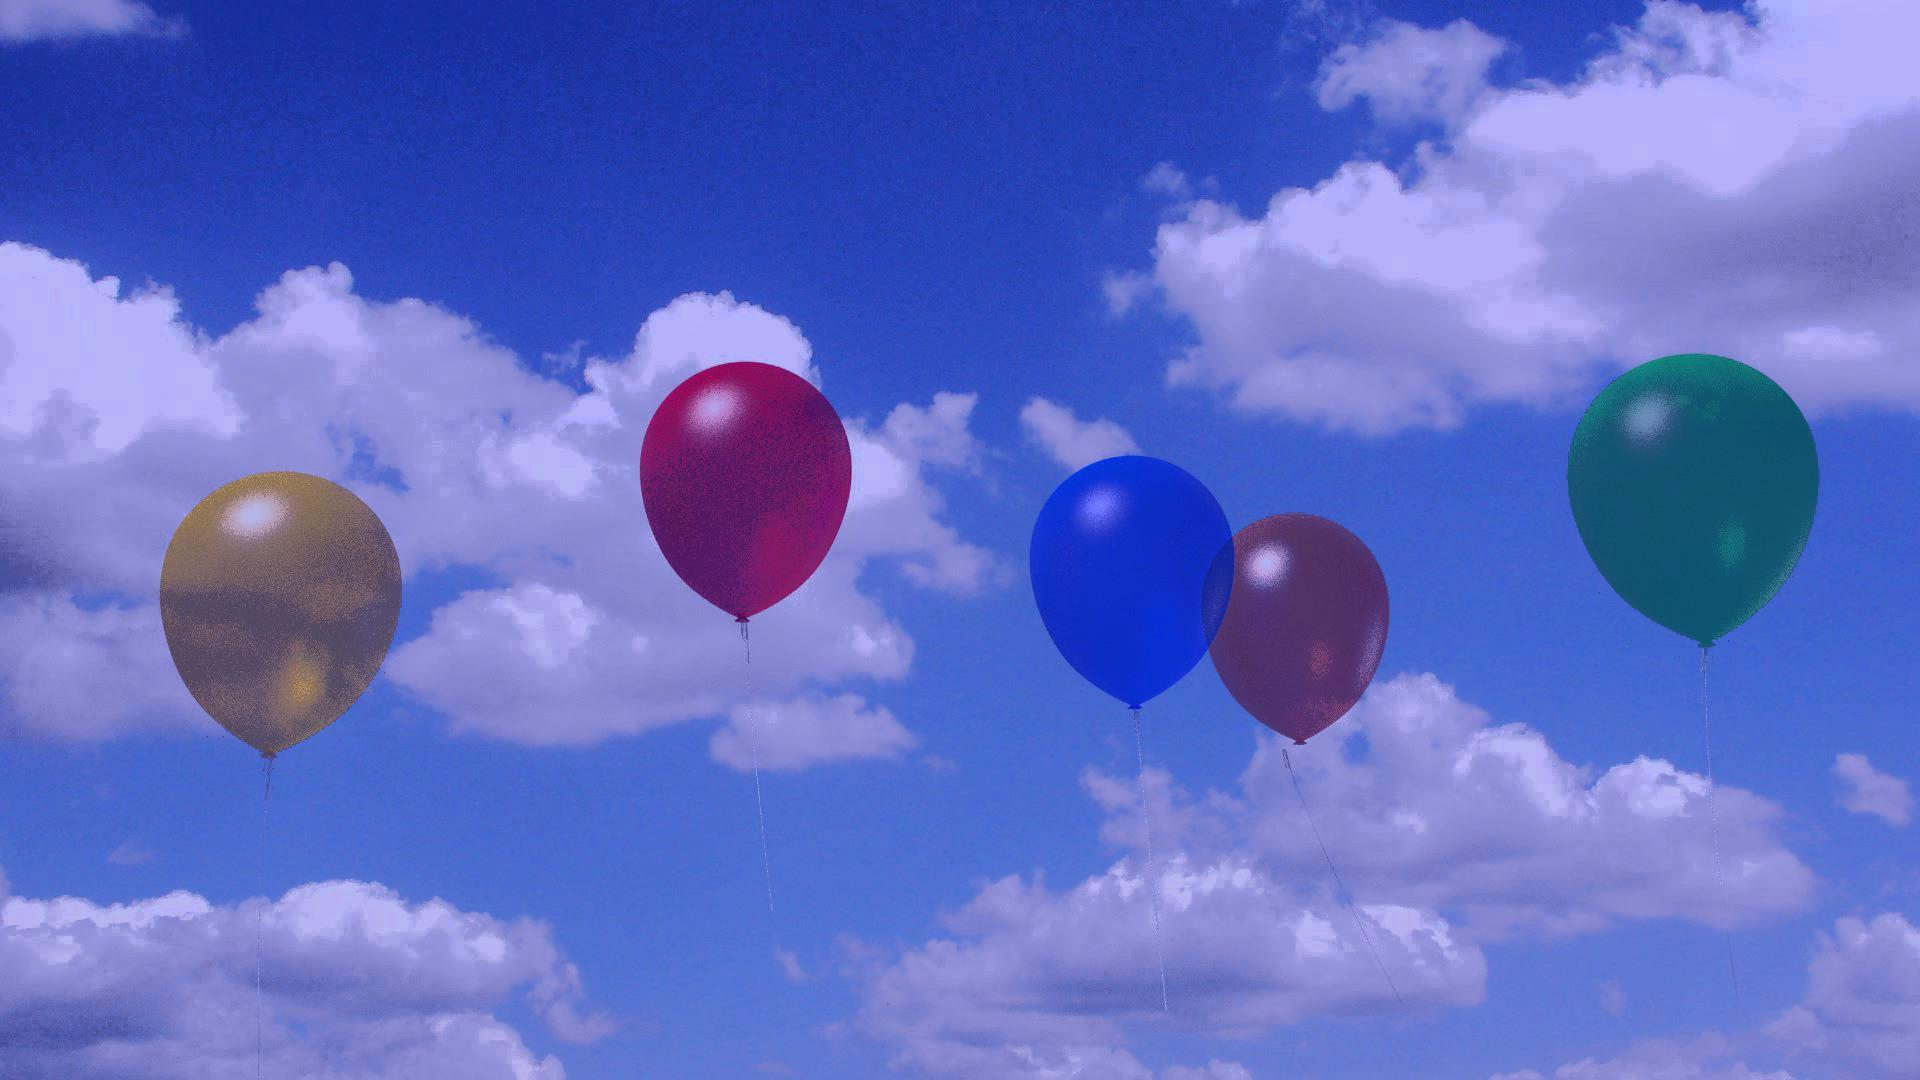

Model:  model_checkpoint_augmented_5.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[0.06584015 0.6828566  0.25130326]]


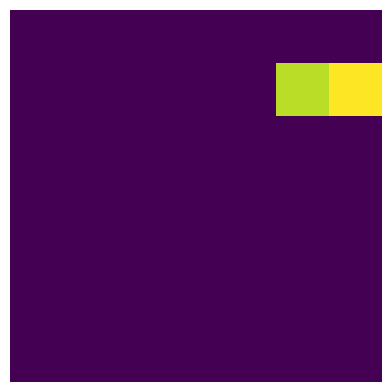

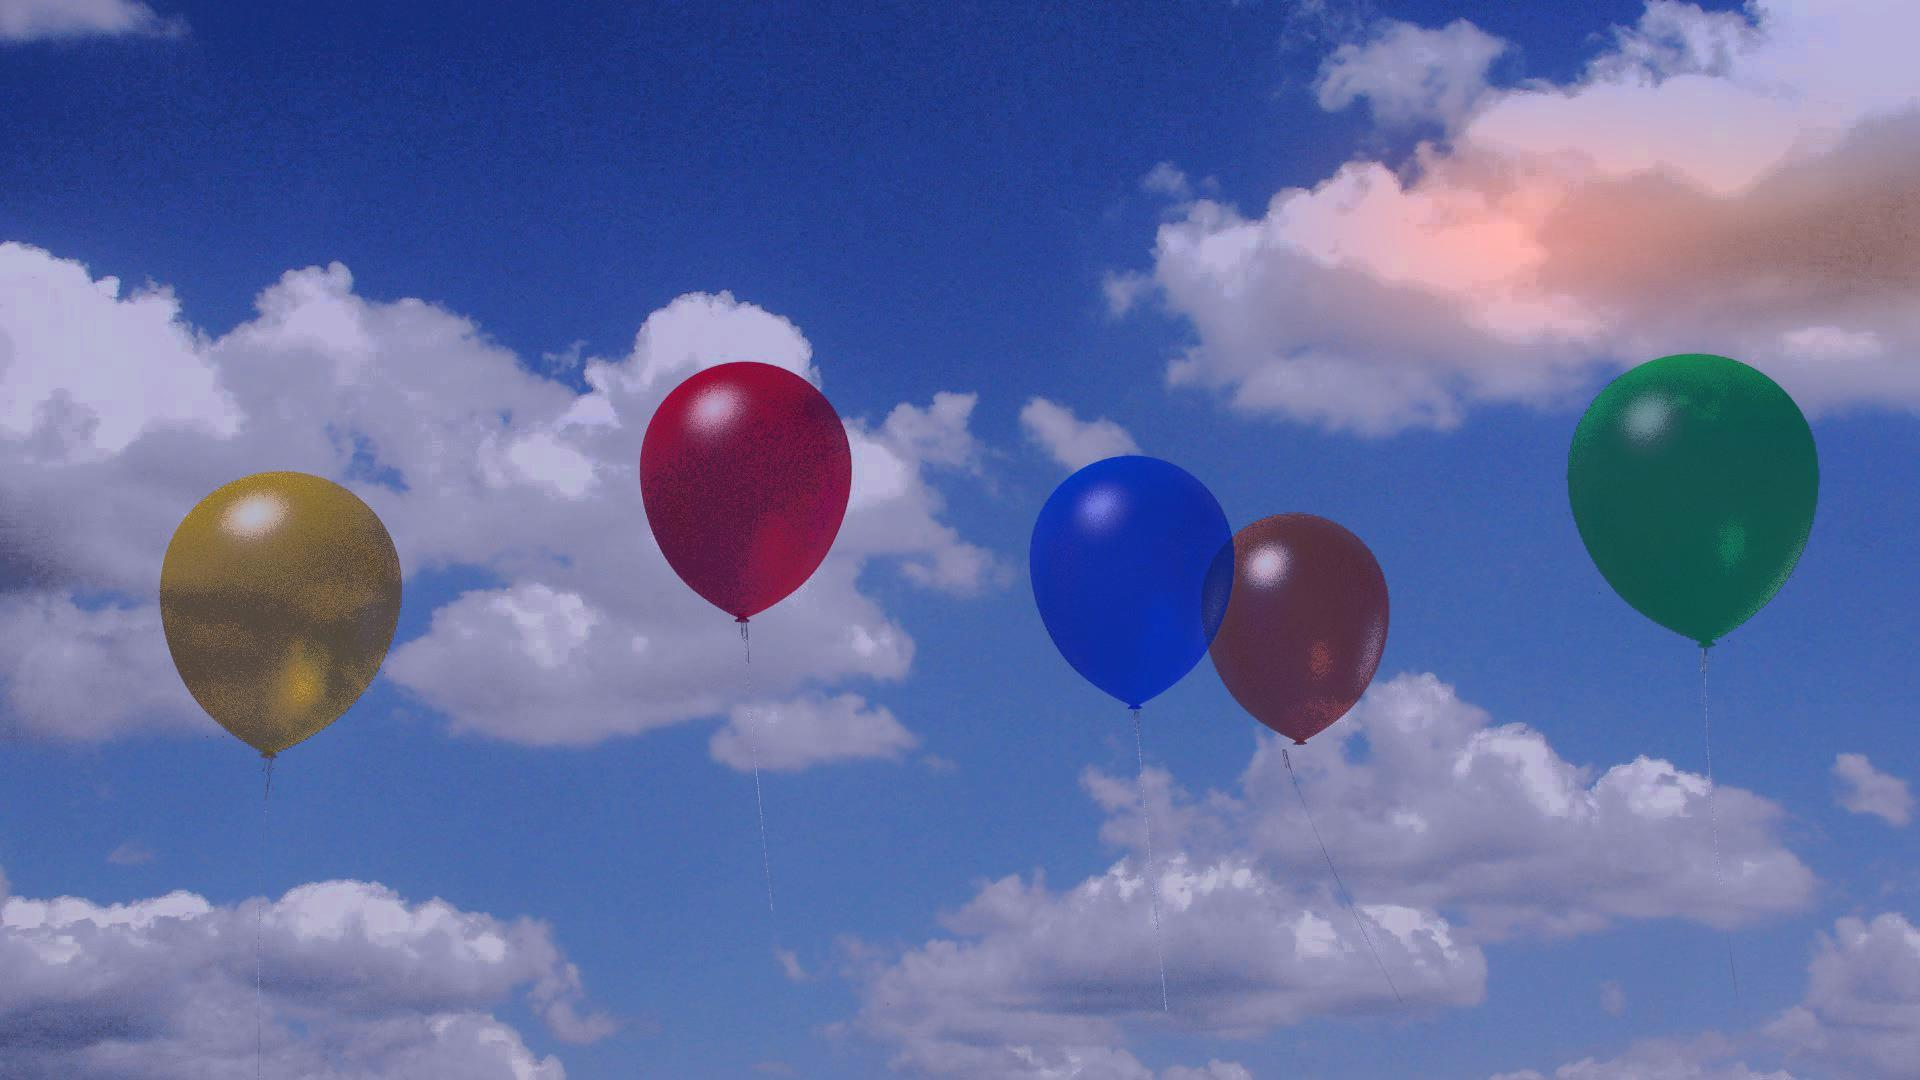

Model:  model_checkpoint_augmented_6.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[0.76402175 0.17099907 0.0649792 ]]


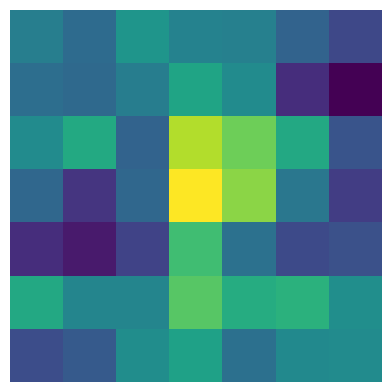

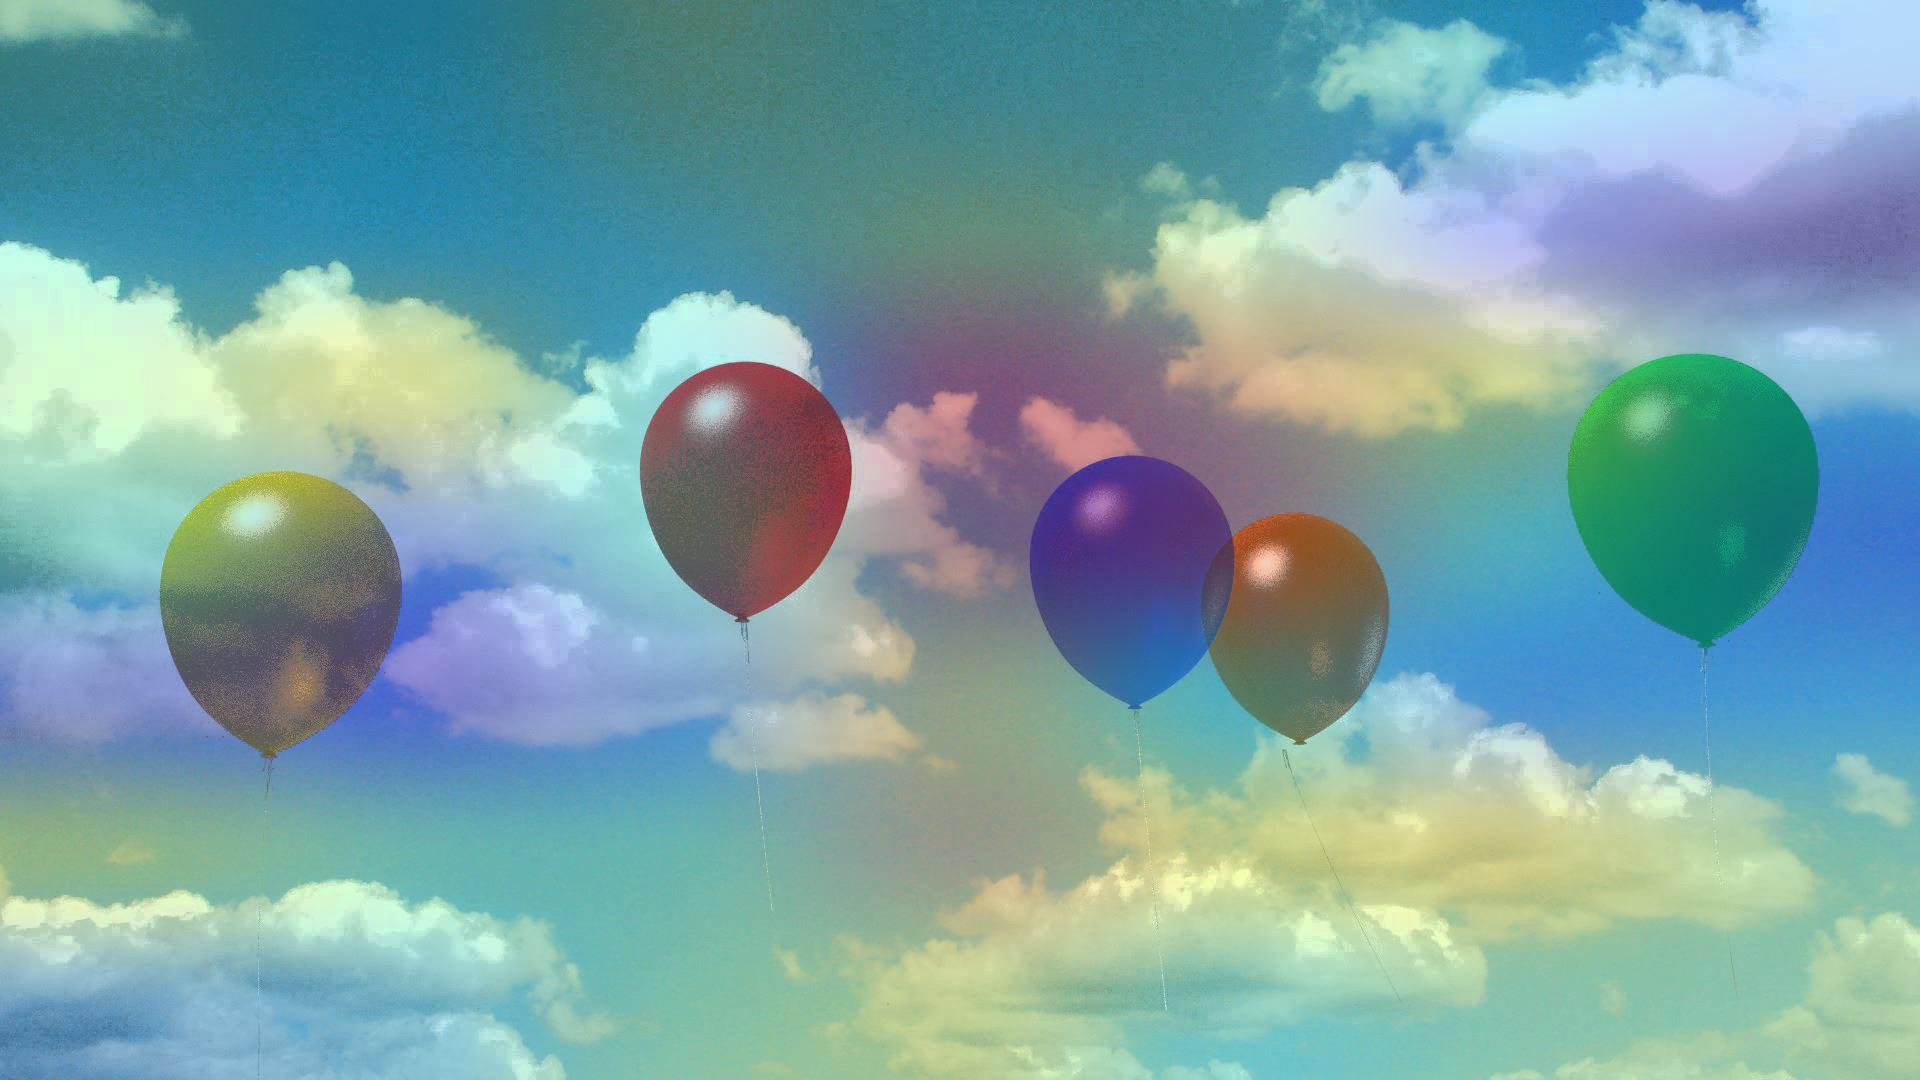

Model:  model_cust_1_checkpoint.keras
Last Convolutational Layer:  conv2d_2
1/1 [==============================] - 1s 627ms/step
Prediciton for the classes:  [[9.8925823e-01 1.0741727e-02 2.1841826e-08]]


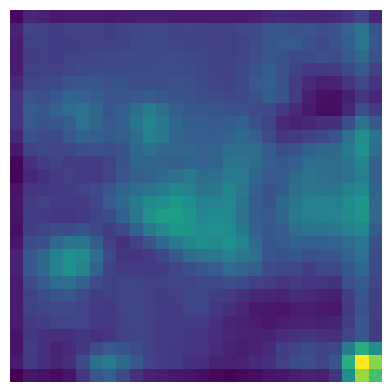

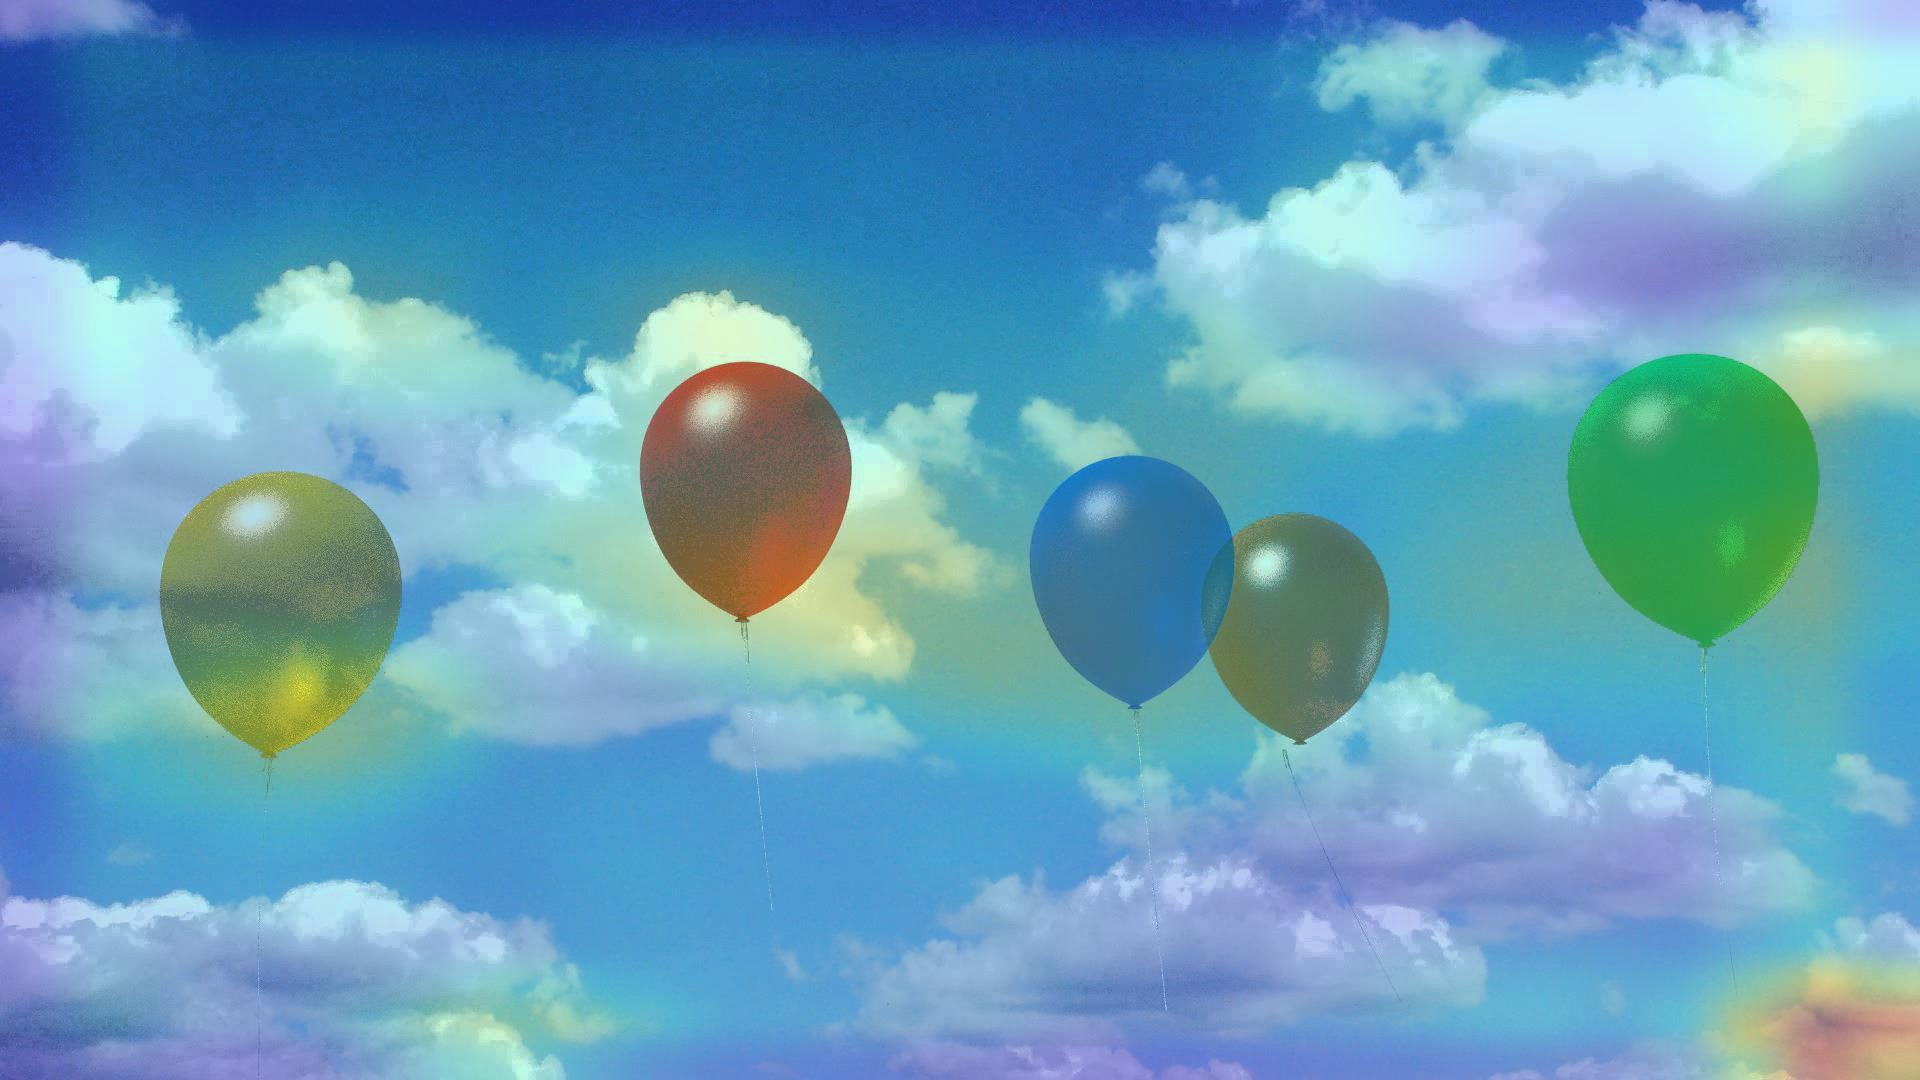

Model:  model_cust_2_checkpoint.keras
Last Convolutational Layer:  conv2d_4
1/1 [==============================] - 1s 675ms/step
Prediciton for the classes:  [[8.4278309e-01 1.5667135e-01 5.4554269e-04]]


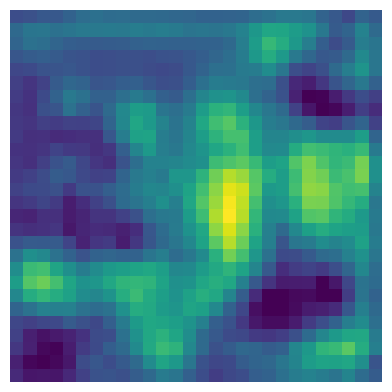

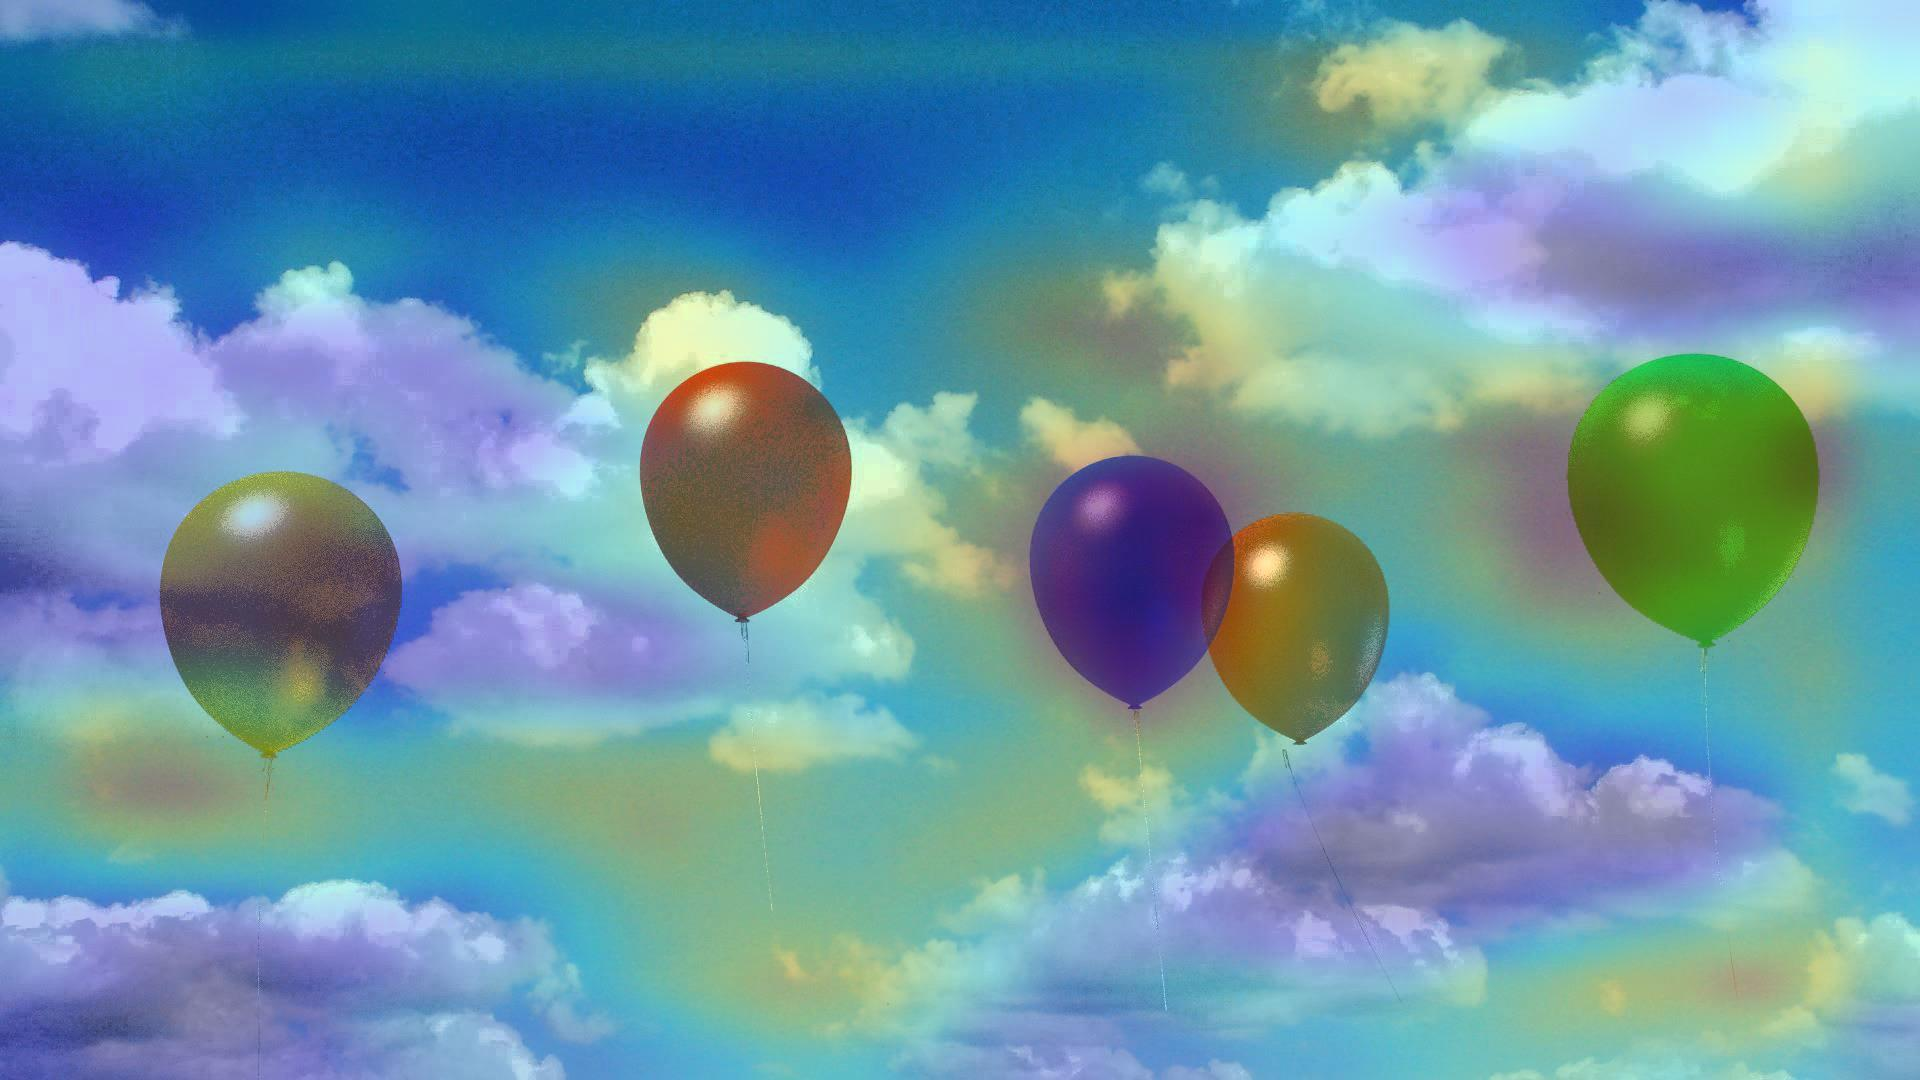

Model:  model_cust_3_checkpoint.keras
Last Convolutational Layer:  conv2d_7
1/1 [==============================] - 1s 689ms/step
Prediciton for the classes:  [[7.0577976e-03 9.9294221e-01 2.7699349e-13]]


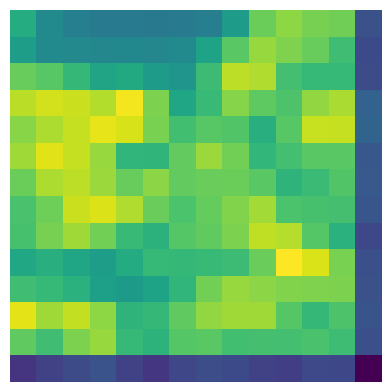

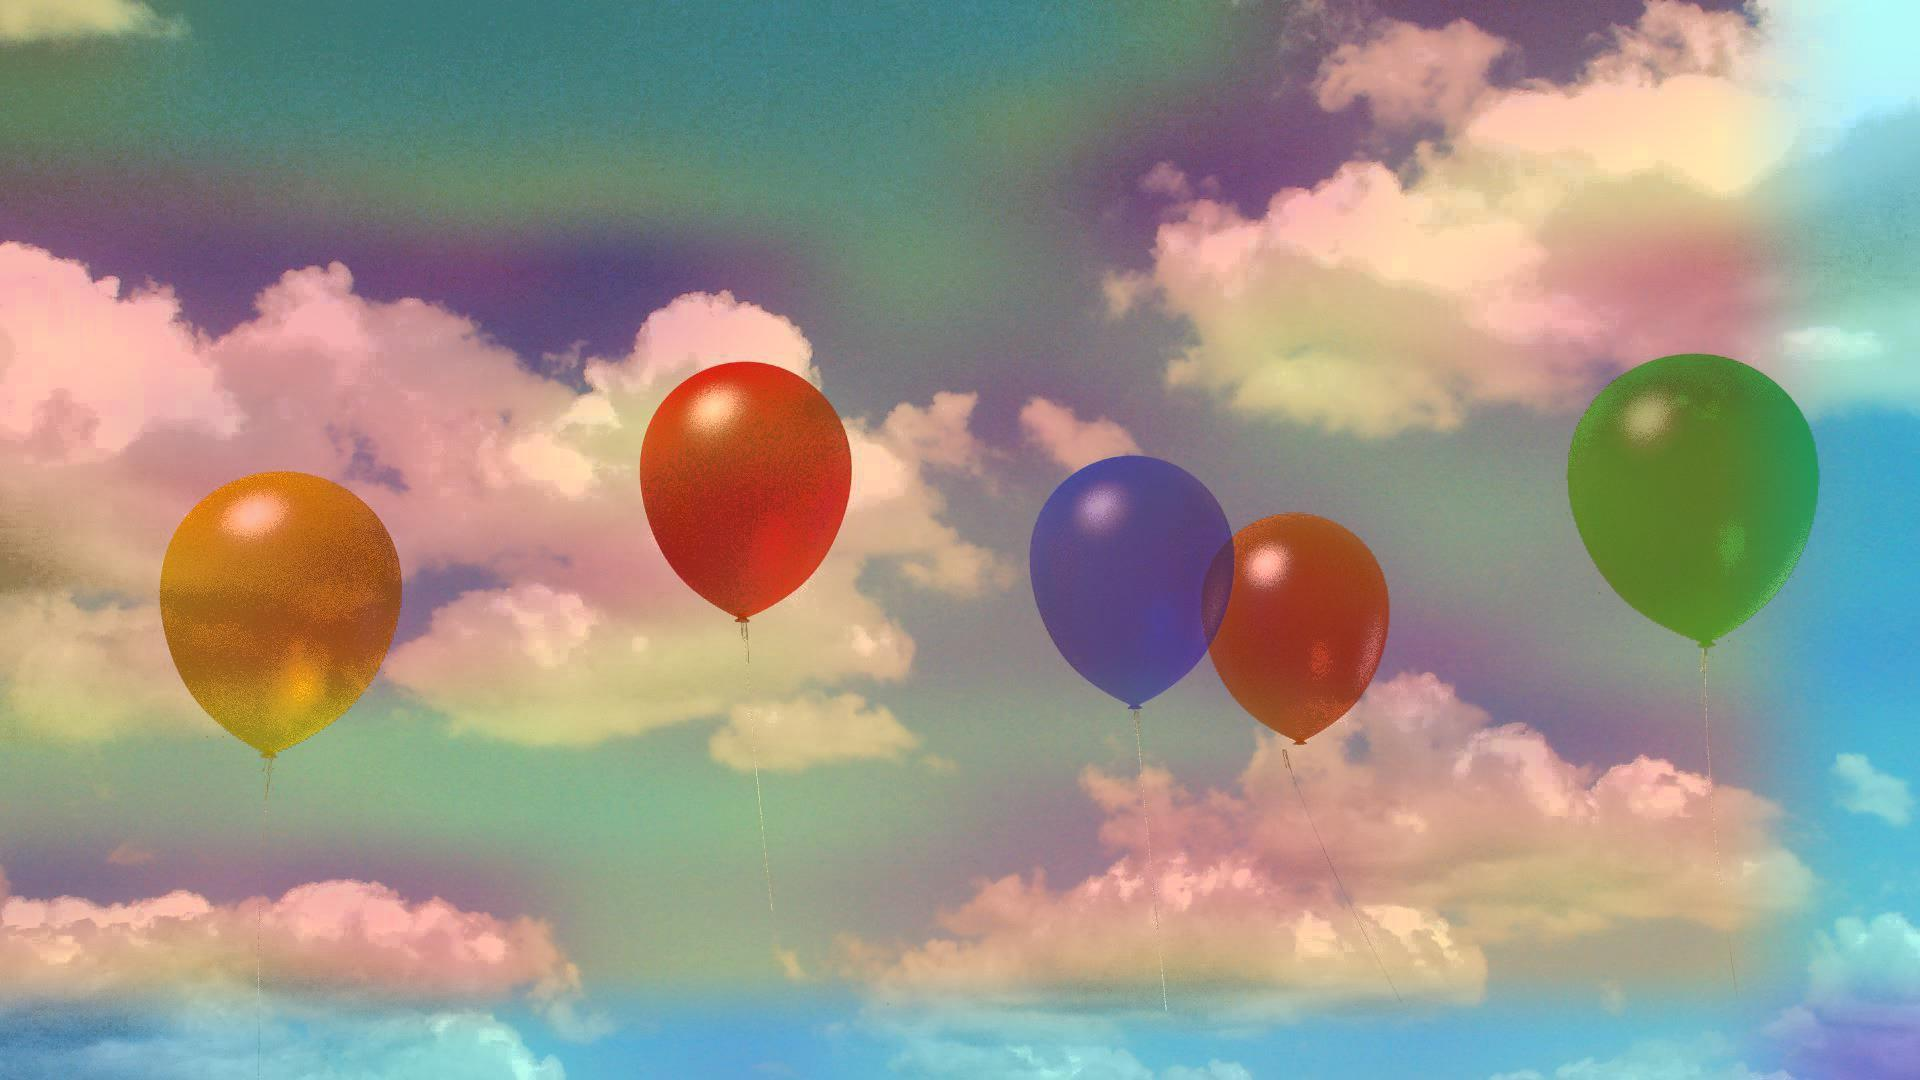

Model:  model_og_checkpoint.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.3563702e-08 9.9999905e-01 9.8346118e-07]]


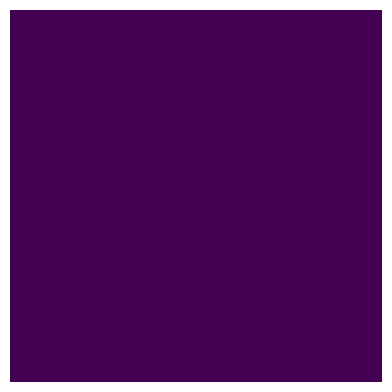

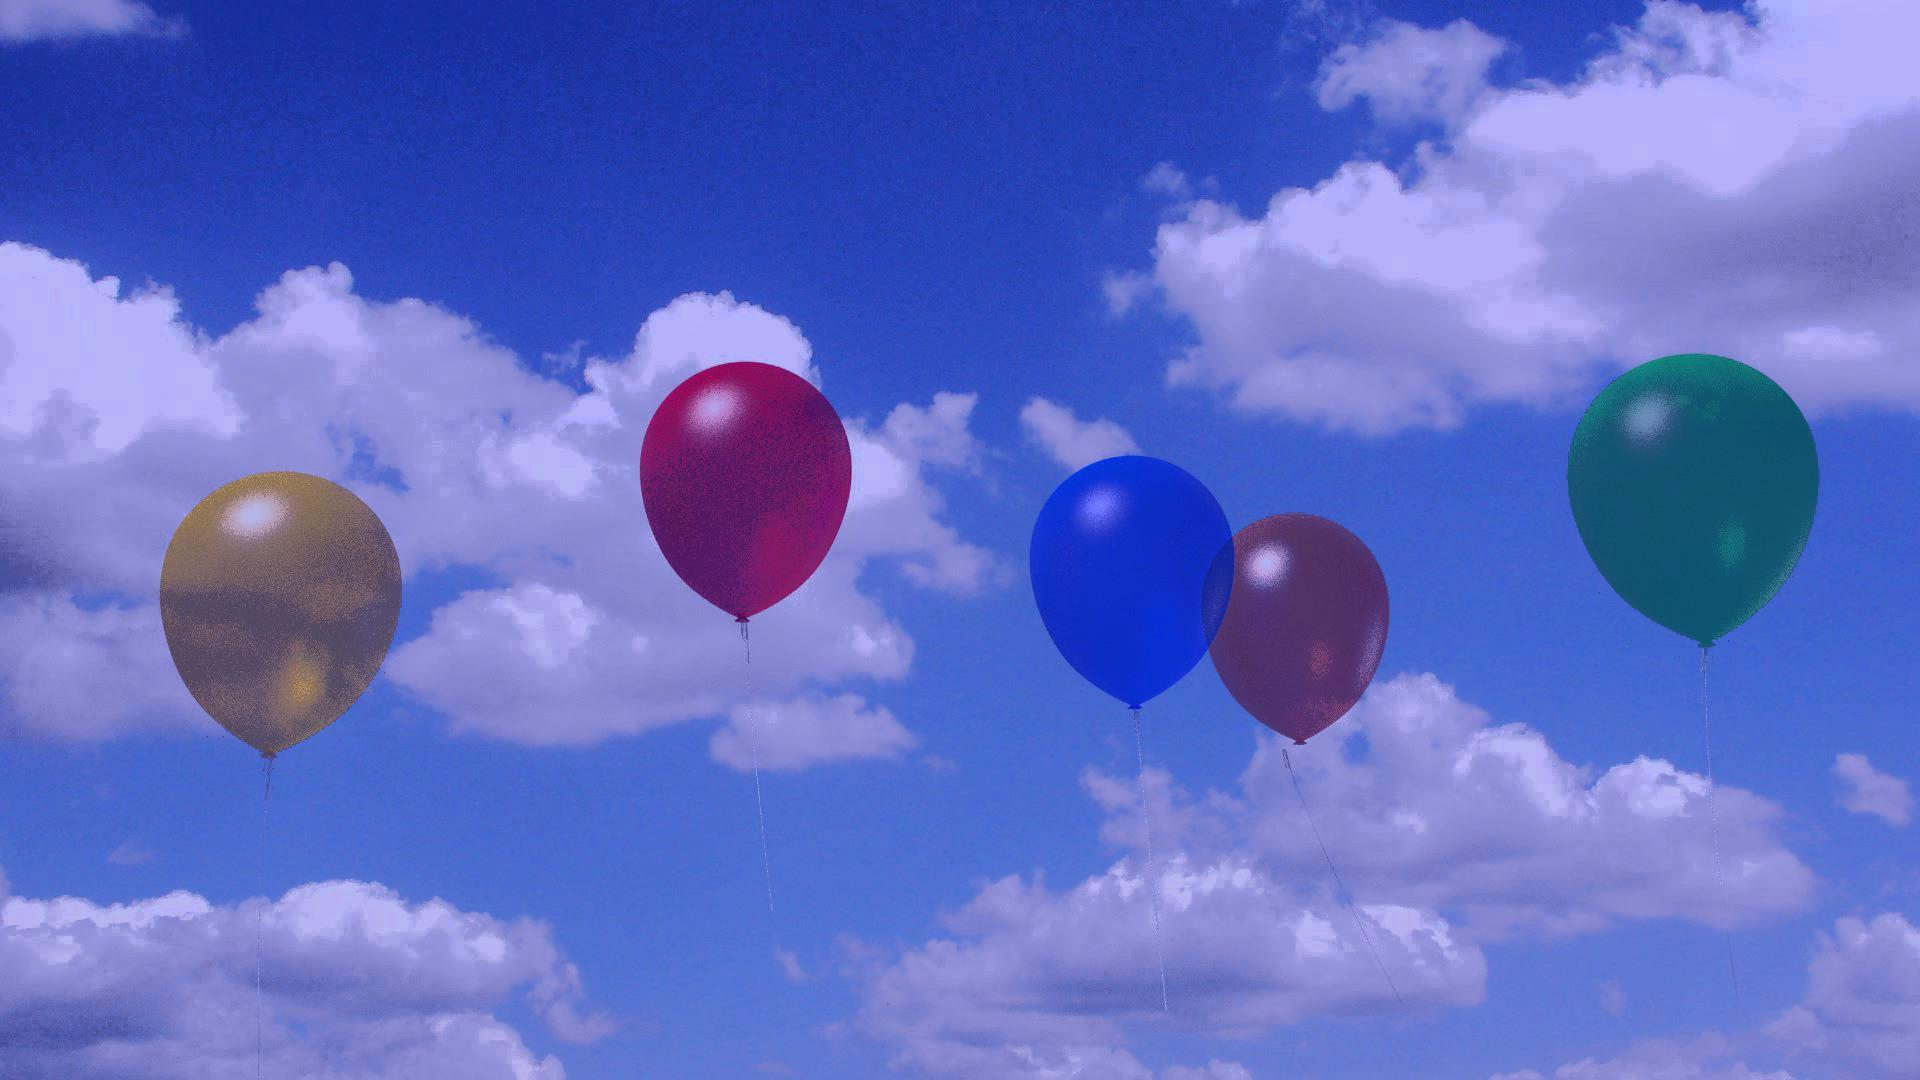

Model:  model_cust_4_checkpoint.keras
Last Convolutational Layer:  conv2d_10
1/1 [==============================] - 1s 660ms/step
Prediciton for the classes:  [[6.2944555e-01 3.7055442e-01 9.3982507e-08]]


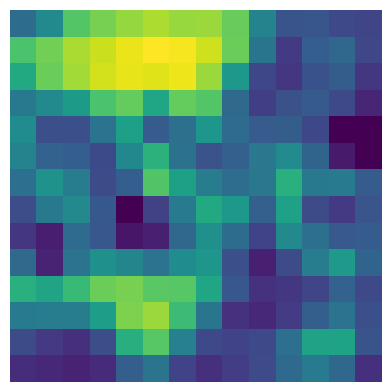

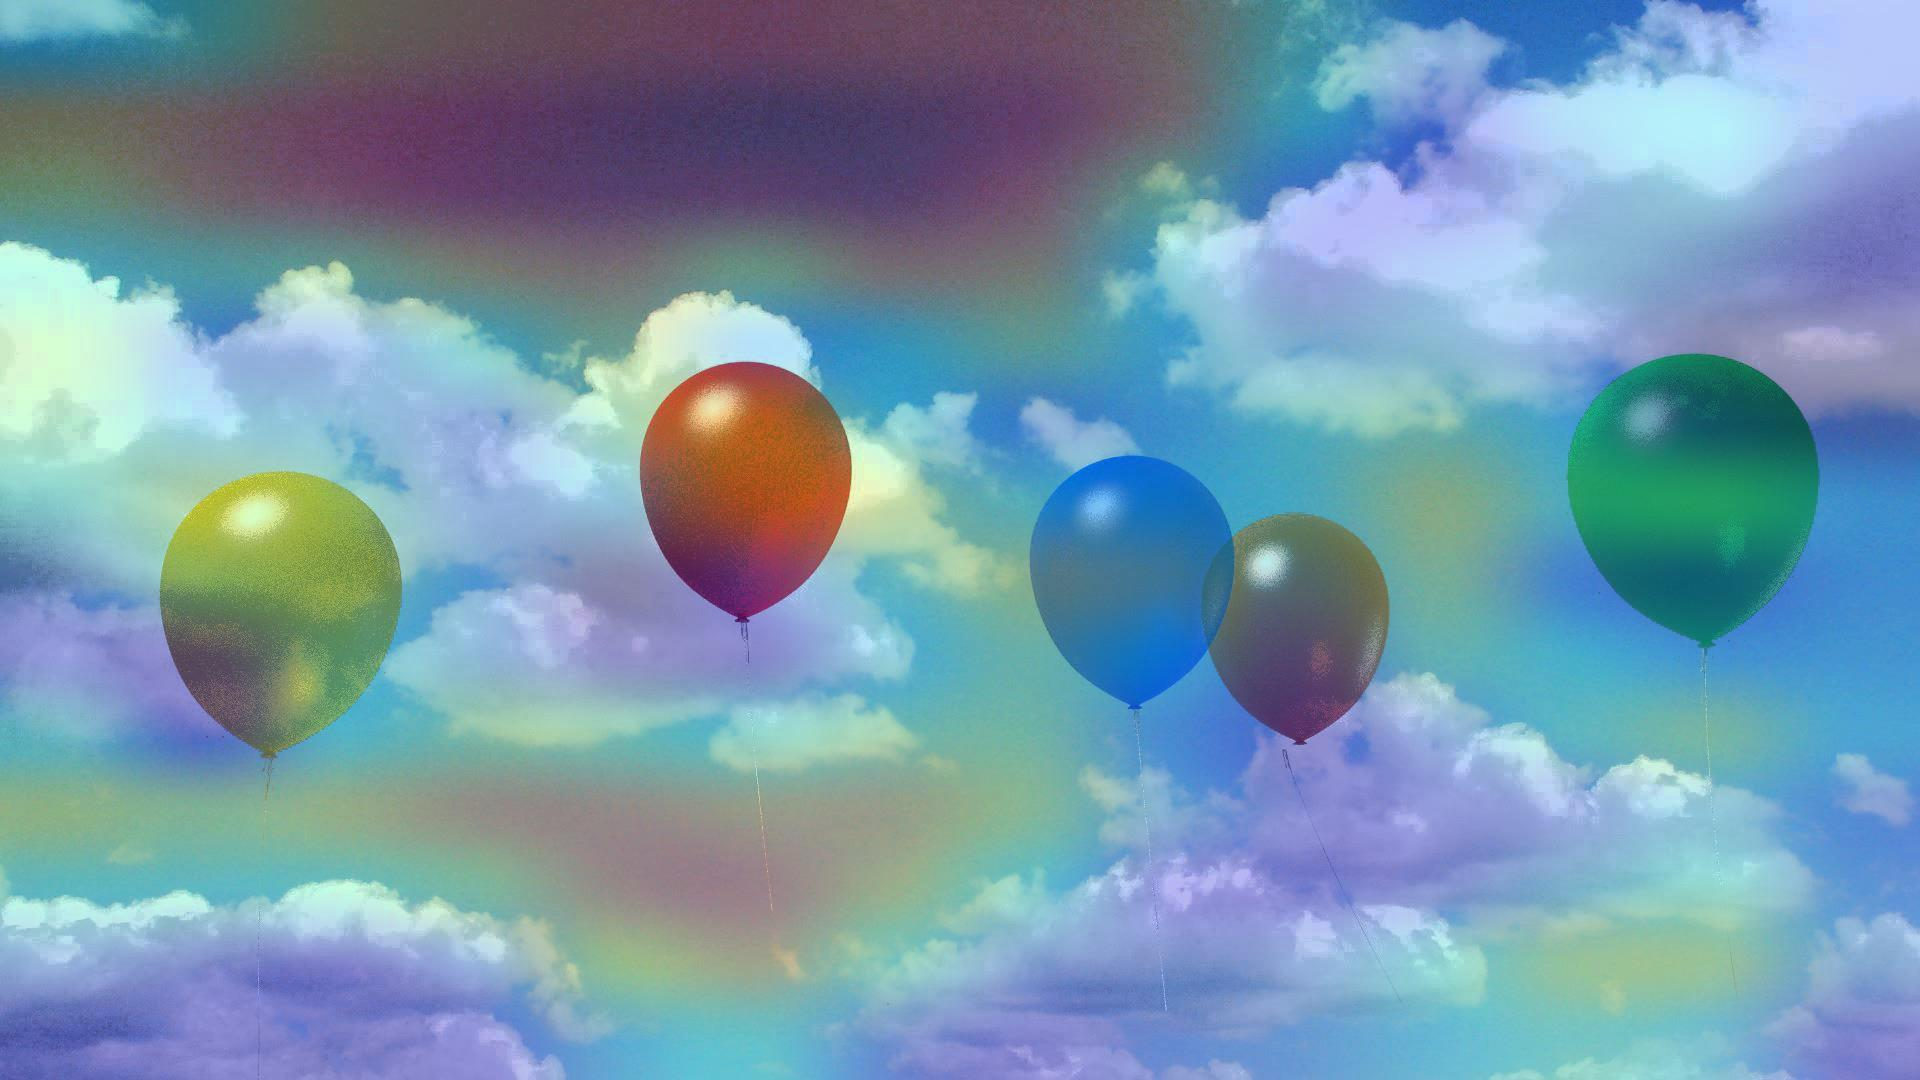

In [ ]:
from tensorflow.keras.models import load_model
import os

# Specify the folder containing the .keras models
folder_path = "drive/MyDrive/ComputerVision/models"

# Path to your image
img_path = 'drive/MyDrive/ComputerVision/ImagesFromInternet/balloons-floating-5.jpg'

 # Specify the class index for which you want to generate the CAM
class_index = 0

#function to get the last convolutional layer of a model
def get_last_conv_layer_name(model):
    last_conv_layer_name = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer_name = layer.name
            break
    return last_conv_layer_name


# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".keras"):
        # Construct the full path to the model file
        print("Model: ",file_name)
        model_path = os.path.join(folder_path, file_name)

        # Load the model using TensorFlow/Keras
        model = load_model(model_path)


        # Name of the last convolutional layer in your model
        last_conv_layer_name = get_last_conv_layer_name(model)
        print("Last Convolutational Layer: ",last_conv_layer_name)
        # Generate CAM
        cam, prediction = generate_CAM(model, img_path, last_conv_layer_name,size = (img_height, img_width),class_index = class_index )

        # Plot the CAM image
        print("Prediciton for the classes: ",prediction)
        plt.matshow(cam)
        plt.axis('off')
        plt.show()

        #show overlay with actual image
        save_and_display_gradcam(img_path, cam)

Model:  model_checkpoint_augmented_0.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.0775958e-10 1.0000000e+00 4.9447899e-09]]


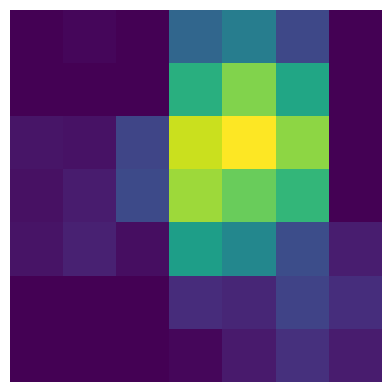

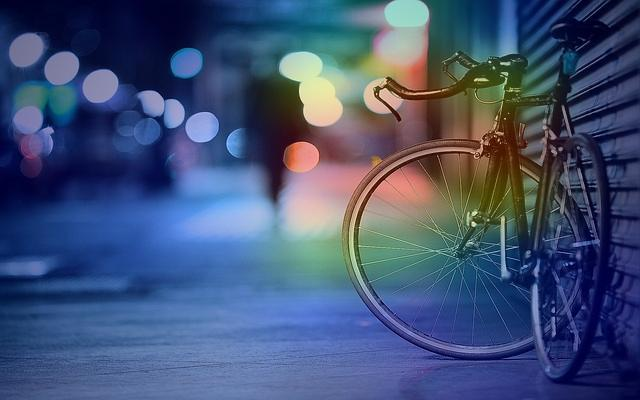

Model:  model_checkpoint_augmented_1.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[2.6504116e-10 1.0000000e+00 8.3244744e-11]]


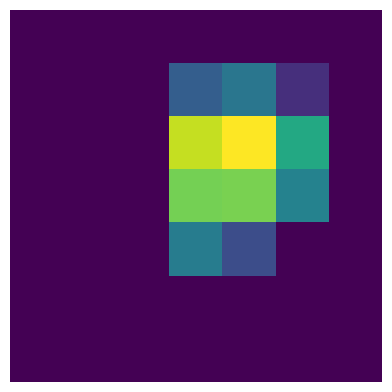

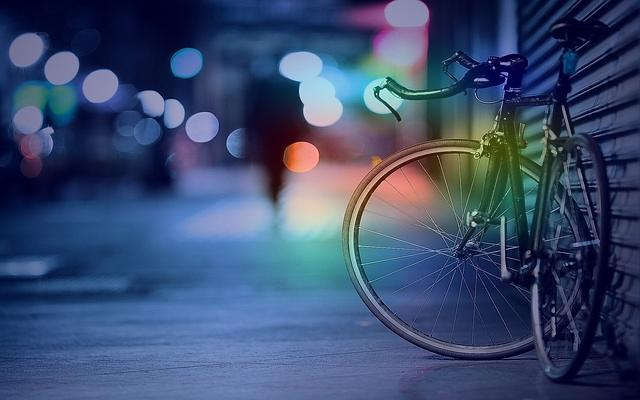

Model:  model_checkpoint_augmented_2.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[6.346148e-13 1.000000e+00 8.613587e-12]]


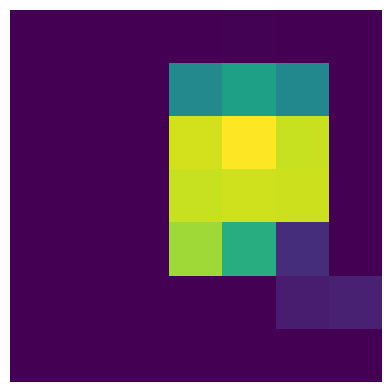

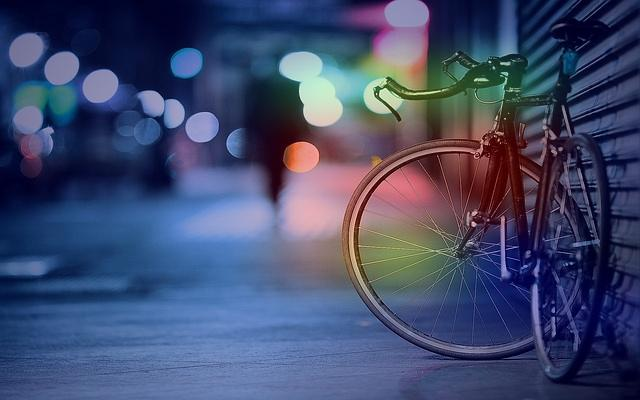

Model:  model_checkpoint_augmented_3.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[4.0254965e-12 1.0000000e+00 1.5472103e-10]]


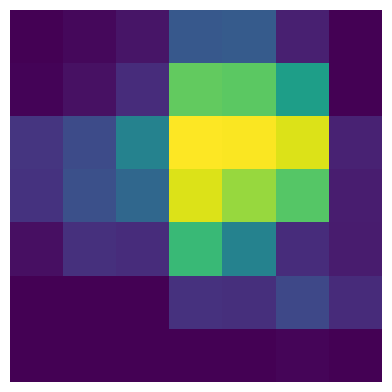

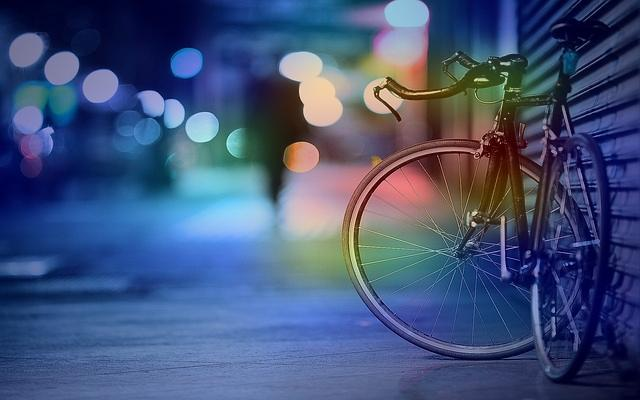

Model:  model_checkpoint_augmented_4.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[2.4399577e-12 1.0000000e+00 2.5841727e-08]]


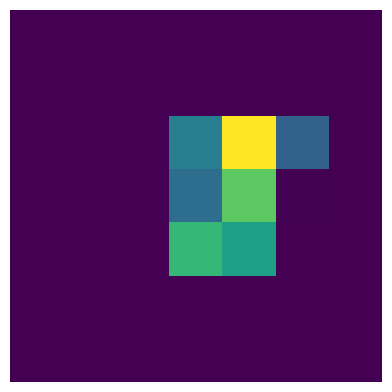

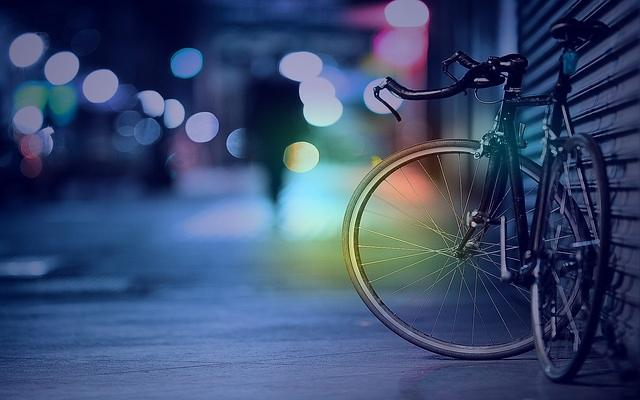

Model:  model_checkpoint_augmented_5.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 2s 2s/step
Prediciton for the classes:  [[3.8354413e-09 9.9904221e-01 9.5781486e-04]]


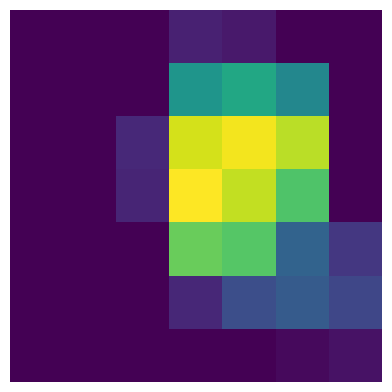

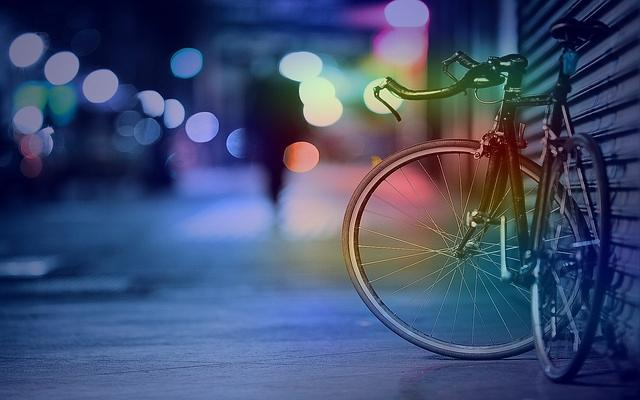

Model:  model_checkpoint_augmented_6.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.2171000e-08 9.9857342e-01 1.4265152e-03]]


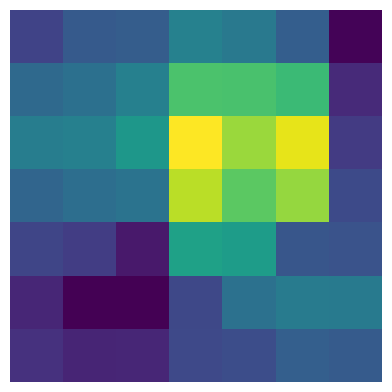

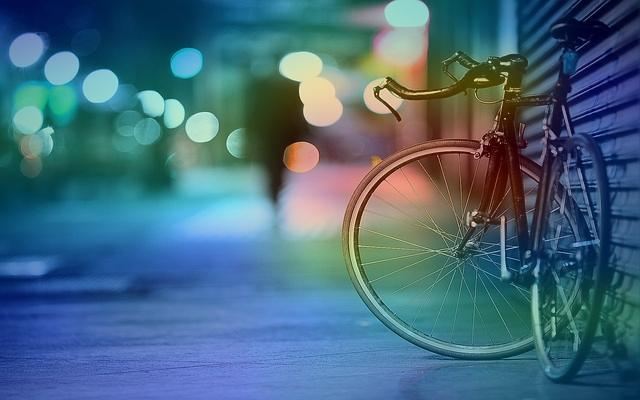

Model:  model_cust_1_checkpoint.keras
Last Convolutational Layer:  conv2d_2
1/1 [==============================] - 1s 584ms/step
Prediciton for the classes:  [[8.8299257e-01 1.1700735e-01 4.2685017e-10]]


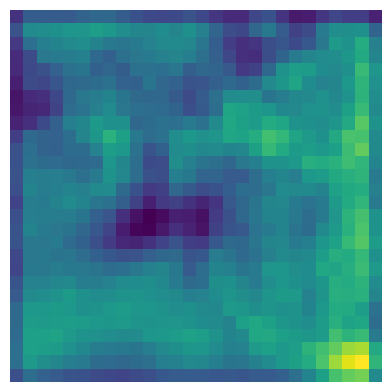

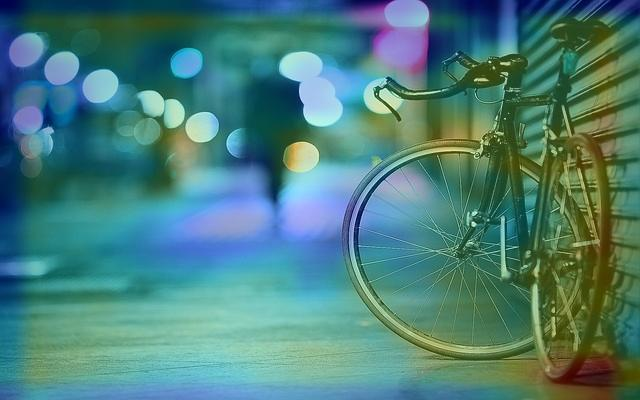

Model:  model_cust_2_checkpoint.keras
Last Convolutational Layer:  conv2d_4
1/1 [==============================] - 1s 619ms/step
Prediciton for the classes:  [[8.89896631e-01 1.09990574e-01 1.12802431e-04]]


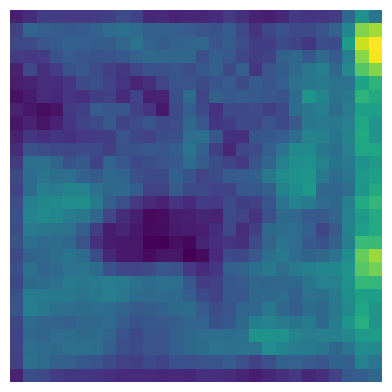

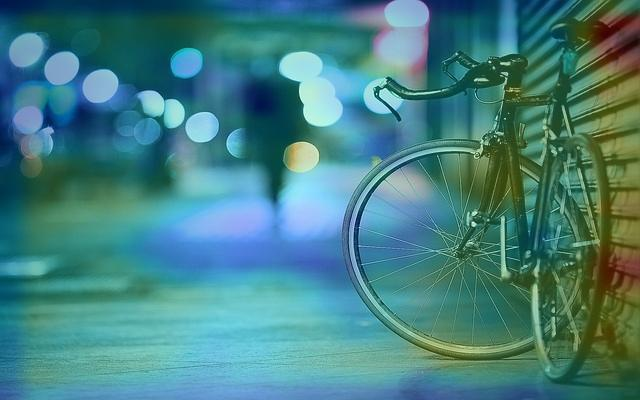

Model:  model_cust_3_checkpoint.keras
Last Convolutational Layer:  conv2d_7
1/1 [==============================] - 1s 745ms/step
Prediciton for the classes:  [[2.5162797e-03 9.9748373e-01 3.0022903e-14]]


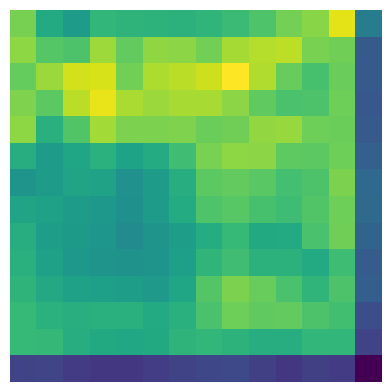

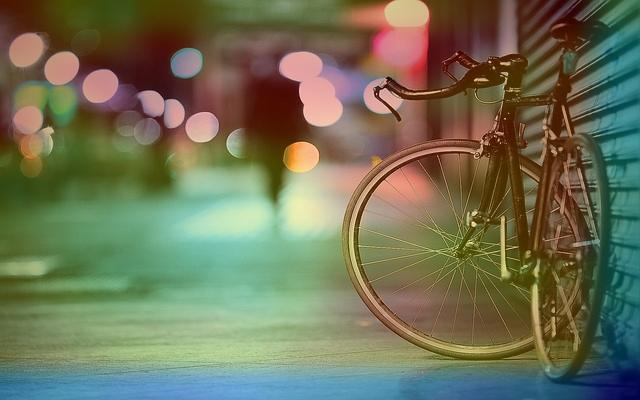

Model:  model_og_checkpoint.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[2.3159741e-11 9.9999988e-01 9.3586493e-08]]


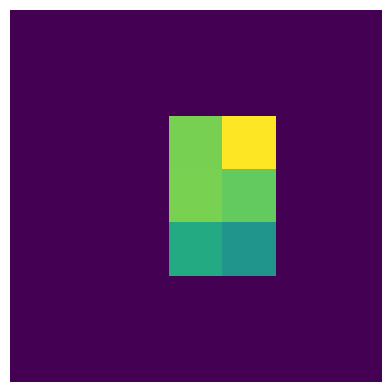

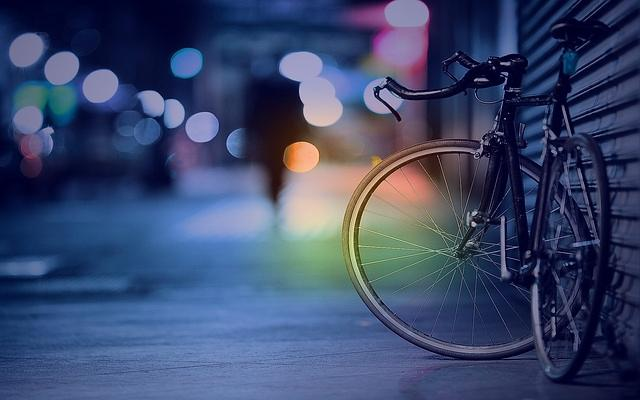

Model:  model_cust_4_checkpoint.keras
Last Convolutational Layer:  conv2d_10
1/1 [==============================] - 1s 718ms/step
Prediciton for the classes:  [[1.4824326e-30 1.0000000e+00 0.0000000e+00]]


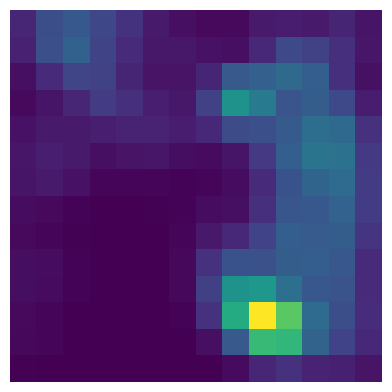

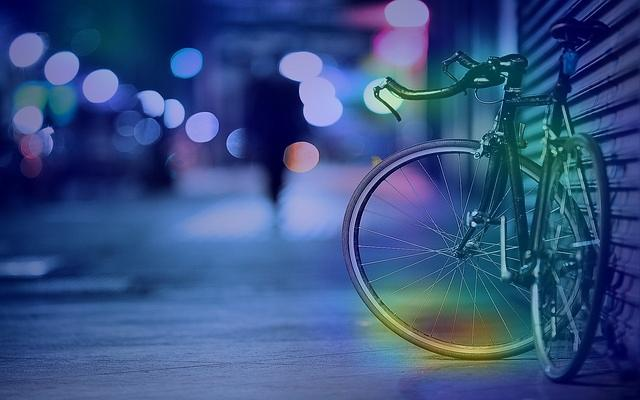

In [ ]:
from tensorflow.keras.models import load_model
import os

# Specify the folder containing the .keras models
folder_path = "drive/MyDrive/ComputerVision/models"

# Path to your image
img_path = 'drive/MyDrive/ComputerVision/ImagesFromInternet/bicycle-1839005_640.jpg'

 # Specify the class index for which you want to generate the CAM
class_index = 1

#function to get the last convolutional layer of a model
def get_last_conv_layer_name(model):
    last_conv_layer_name = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer_name = layer.name
            break
    return last_conv_layer_name


# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".keras"):
        # Construct the full path to the model file
        print("Model: ",file_name)
        model_path = os.path.join(folder_path, file_name)

        # Load the model using TensorFlow/Keras
        model = load_model(model_path)





        # Name of the last convolutional layer in your model
        last_conv_layer_name = get_last_conv_layer_name(model)
        print("Last Convolutational Layer: ",last_conv_layer_name)
        # Generate CAM
        cam, prediction = generate_CAM(model, img_path, last_conv_layer_name,size = (img_height, img_width),class_index = class_index)

        # Plot the CAM image
        print("Prediciton for the classes: ",prediction)

        plt.matshow(cam)
        plt.axis('off')
        plt.show()

        #show overlay with actual image
        save_and_display_gradcam(img_path, cam)

Model:  model_checkpoint_augmented_0.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[8.000044e-05 9.998560e-01 6.394685e-05]]


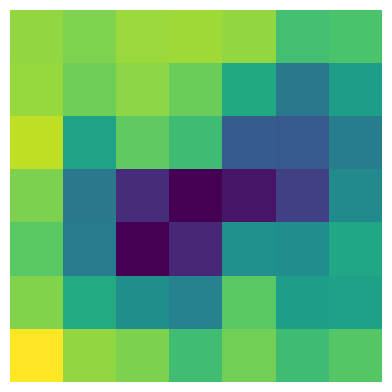

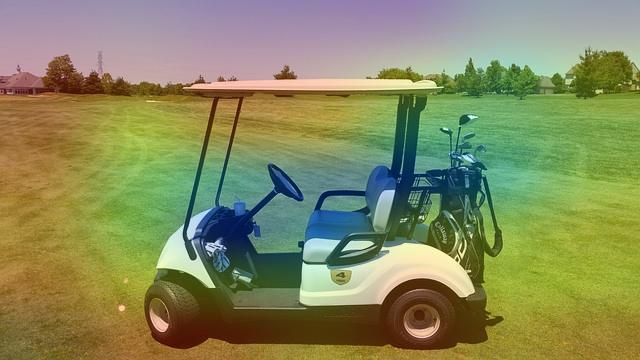

Model:  model_checkpoint_augmented_1.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[4.8609866e-07 9.9999952e-01 3.4772069e-10]]


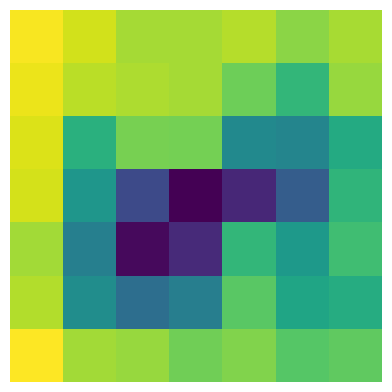

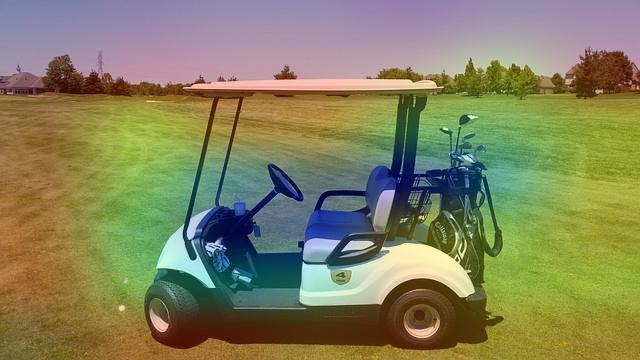

Model:  model_checkpoint_augmented_2.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[7.6767074e-06 9.9999237e-01 2.4673874e-08]]


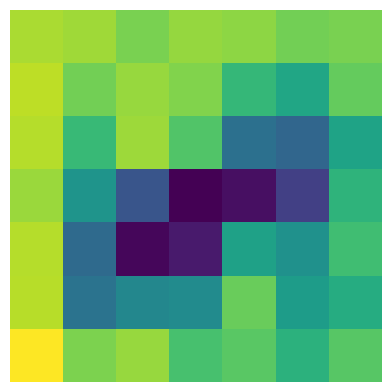

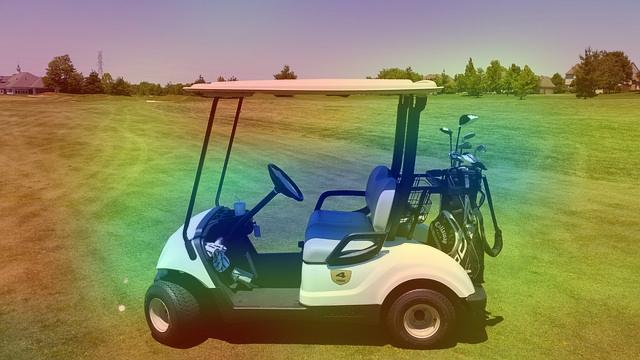

Model:  model_checkpoint_augmented_3.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[6.774103e-07 9.999988e-01 4.446223e-07]]


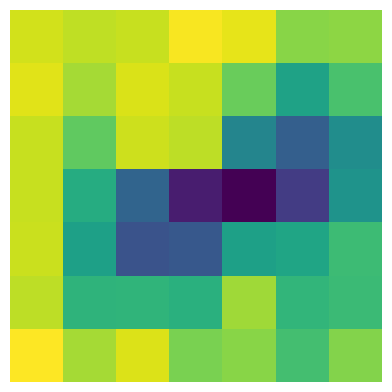

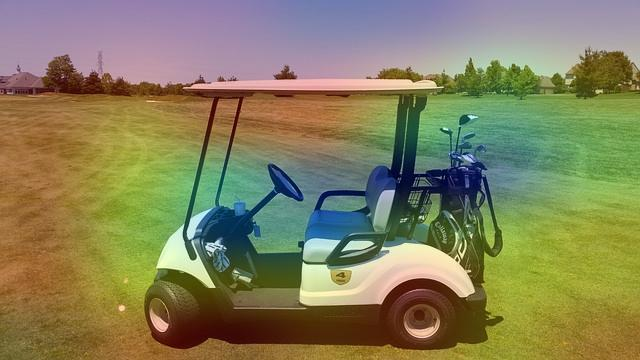

Model:  model_checkpoint_augmented_4.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[2.8214190e-11 9.9999881e-01 1.1694926e-06]]


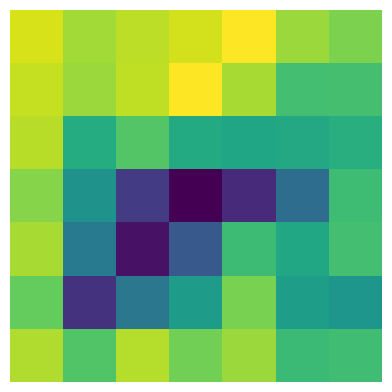

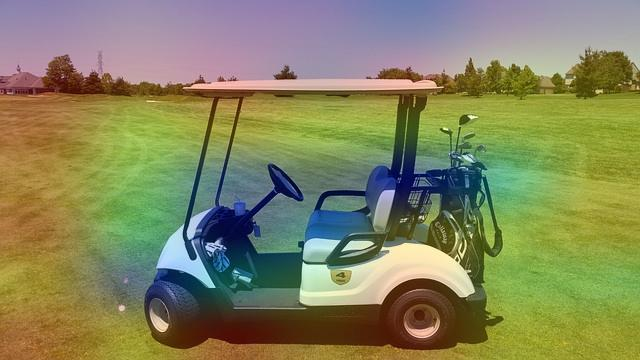

Model:  model_checkpoint_augmented_5.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.0858483e-06 9.7354692e-01 2.6452065e-02]]


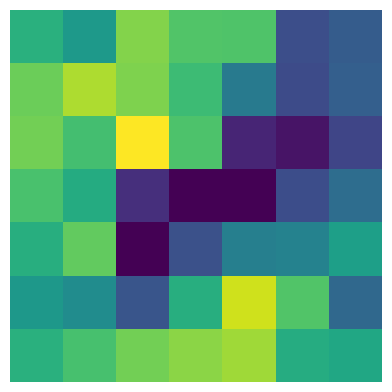

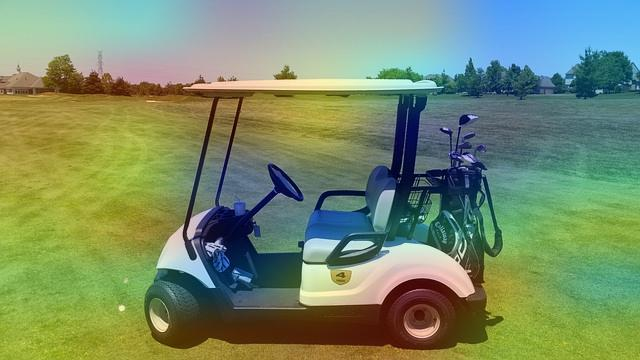

Model:  model_checkpoint_augmented_6.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[8.1230165e-04 9.8917180e-01 1.0015904e-02]]


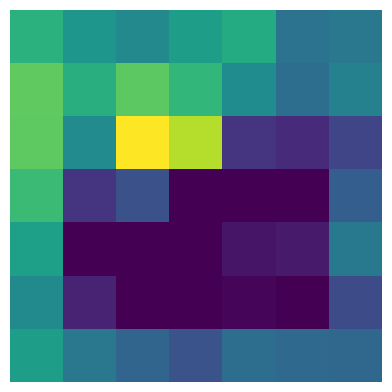

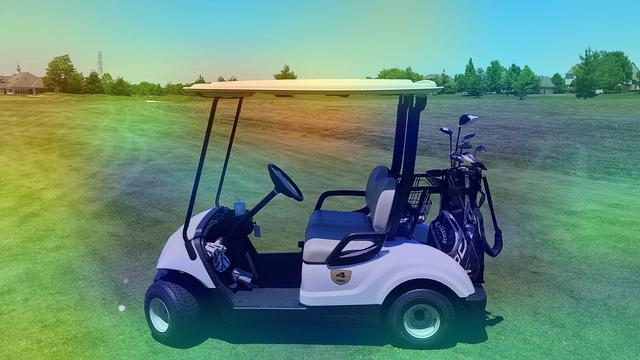

Model:  model_cust_1_checkpoint.keras
Last Convolutational Layer:  conv2d_2
1/1 [==============================] - 1s 556ms/step
Prediciton for the classes:  [[9.4611055e-01 5.3889427e-02 1.7218375e-10]]


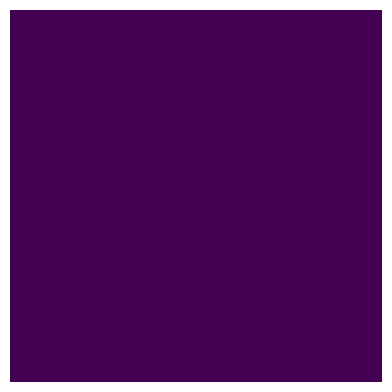

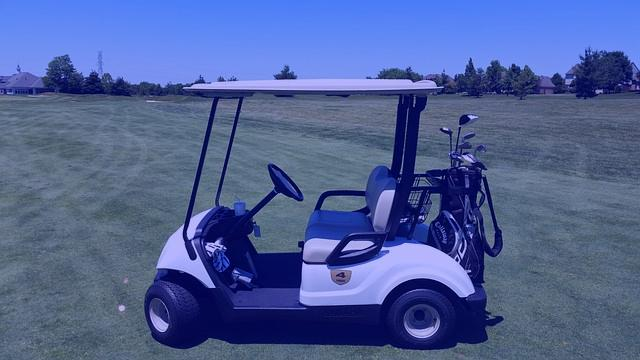

Model:  model_cust_2_checkpoint.keras
Last Convolutational Layer:  conv2d_4
1/1 [==============================] - 1s 602ms/step
Prediciton for the classes:  [[9.3574524e-01 6.4245045e-02 9.6602853e-06]]


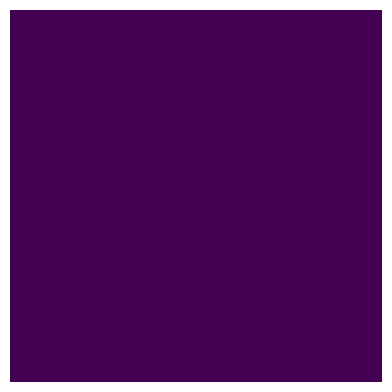

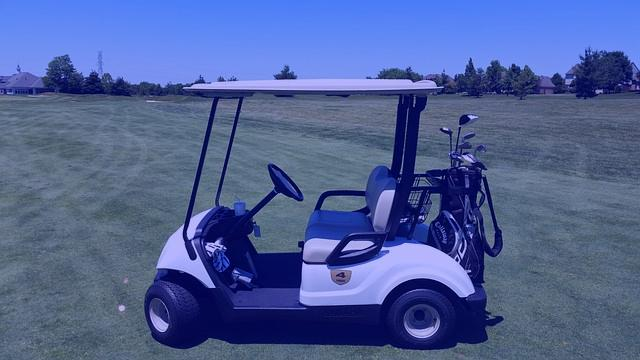

Model:  model_cust_3_checkpoint.keras
Last Convolutational Layer:  conv2d_7
1/1 [==============================] - 1s 633ms/step
Prediciton for the classes:  [[1.7930425e-03 9.9820697e-01 2.3010053e-14]]


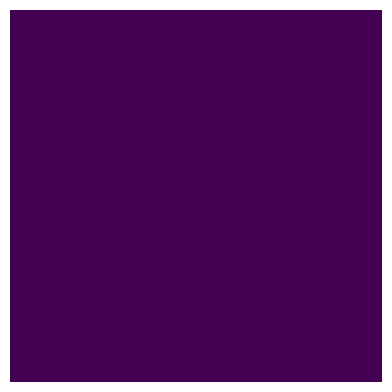

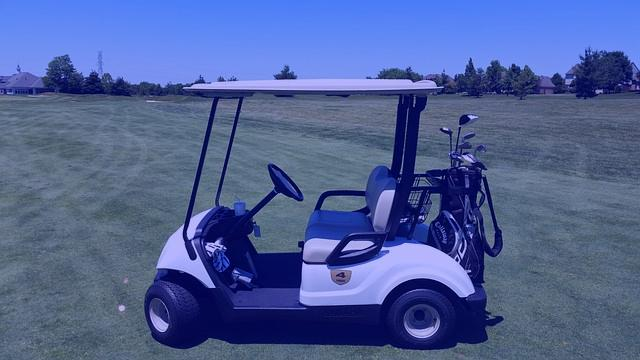

Model:  model_og_checkpoint.keras
Last Convolutational Layer:  conv5_block3_3_conv
1/1 [==============================] - 1s 1s/step
Prediciton for the classes:  [[1.9510069e-09 1.0000000e+00 4.4237336e-08]]


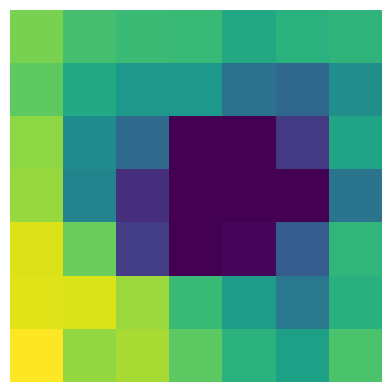

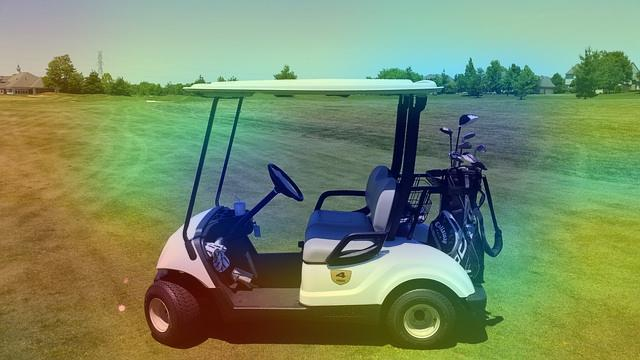

Model:  model_cust_4_checkpoint.keras
Last Convolutational Layer:  conv2d_10
1/1 [==============================] - 1s 619ms/step
Prediciton for the classes:  [[2.3892045e-22 1.0000000e+00 2.7194235e-37]]


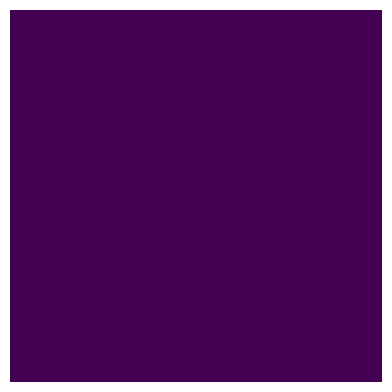

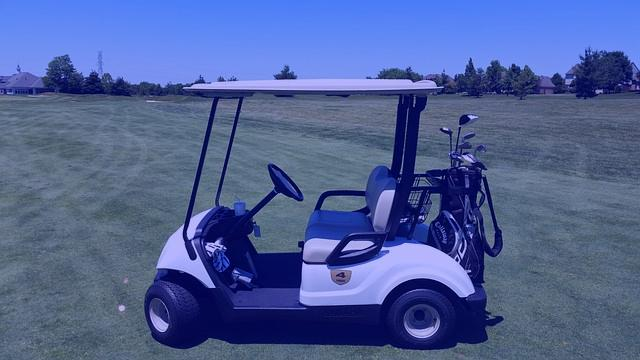

In [ ]:
from tensorflow.keras.models import load_model
import os

# Specify the folder containing the .keras models
folder_path = "drive/MyDrive/ComputerVision/models"

# Path to your image
img_path = 'drive/MyDrive/ComputerVision/ImagesFromInternet/golf-cart-756048_640.jpg'


 # Specify the class index for which you want to generate the CAM
class_index = 2

#function to get the last convolutional layer of a model
def get_last_conv_layer_name(model):
    last_conv_layer_name = None
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            last_conv_layer_name = layer.name
            break
    return last_conv_layer_name


# Iterate over files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith(".keras"):
        # Construct the full path to the model file
        print("Model: ",file_name)
        model_path = os.path.join(folder_path, file_name)

        # Load the model using TensorFlow/Keras
        model = load_model(model_path)


        # Name of the last convolutional layer in your model
        last_conv_layer_name = get_last_conv_layer_name(model)
        print("Last Convolutational Layer: ",last_conv_layer_name)
        # Generate CAM
        cam, prediction = generate_CAM(model, img_path, last_conv_layer_name,size = (img_height, img_width),class_index = class_index)

        # Plot the CAM image
        print("Prediciton for the classes: ",prediction)
        plt.matshow(cam)
        plt.axis('off')
        plt.show()

        #show overlay with actual image
        save_and_display_gradcam(img_path, cam)